## EDA - Bank Defaulter case study

### Business Understanding: 
The company/bank is involved in money lending buisiness. When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:


> •	If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.


> •	If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

Both of these cases result in a loss to the bank.

###Problem Statement:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 

## 1. Importing libraries and Reading dataset(s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the datasets

In [4]:
data0 = pd.read_csv('/content/drive/MyDrive/Project/csv/application_data.csv')

In [5]:
data1 = pd.read_csv('/content/drive/MyDrive/Project/csv/previous_application.csv')

In [6]:
#Column descriptions
des = pd.read_csv('/content/drive/MyDrive/Project/csv/columns_description.csv', engine='python')

Rudimentary inspection of application data

In [7]:
data0.shape, data1.shape

((307511, 122), (1670214, 37))

In [8]:
data0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data0.info(verbose = True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [10]:
#statistical summary of numerical variables
data0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## 2. Data Cleaning

In [11]:
#changing the column names to lower-case for convinience
data0.columns = data0.columns.astype('str').map(lambda x: x.lower())

### 2.1 Handling Missing values

In [12]:
#list of columns with at least one values missing
missing_col = [col for col in data0.columns if data0[col].isna().sum()/data0.shape[0] > 0]

data0.shape[0] gives the count of  total no.of rows present in 1st Column(0th index).
So for every column, the sum of null values/ total values.

In [13]:
#checking number of such columns
len(missing_col)

67

In [14]:
#number of columns with more than 40% missing values
missing_col1 = [col for col in data0.columns if data0[col].isna().sum()/data0.shape[0] > 0.4]
len(missing_col1)

49

In [15]:
#dropping columns with more than 40% missing values
data0.drop(missing_col1, axis = 1, inplace = True)

In [16]:
#shape of dataframe upon dropping columns
data0.shape

(307511, 73)

In [17]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   307511 non-null  int64  
 1   target                       307511 non-null  int64  
 2   name_contract_type           307511 non-null  object 
 3   code_gender                  307511 non-null  object 
 4   flag_own_car                 307511 non-null  object 
 5   flag_own_realty              307511 non-null  object 
 6   cnt_children                 307511 non-null  int64  
 7   amt_income_total             307511 non-null  float64
 8   amt_credit                   307511 non-null  float64
 9   amt_annuity                  307499 non-null  float64
 10  amt_goods_price              307233 non-null  float64
 11  name_type_suite              306219 non-null  object 
 12  name_income_type             307511 non-null  object 
 13 

In [18]:
#columns sorted by percentage of missing values
x = data0.isnull().sum()/data0.shape[0]*100
x[x > 0].sort_values()

days_last_phone_change         0.000325
cnt_fam_members                0.000650
amt_annuity                    0.003902
amt_goods_price                0.090403
ext_source_2                   0.214626
def_60_cnt_social_circle       0.332021
obs_60_cnt_social_circle       0.332021
def_30_cnt_social_circle       0.332021
obs_30_cnt_social_circle       0.332021
name_type_suite                0.420148
amt_req_credit_bureau_qrt     13.501631
amt_req_credit_bureau_hour    13.501631
amt_req_credit_bureau_day     13.501631
amt_req_credit_bureau_week    13.501631
amt_req_credit_bureau_mon     13.501631
amt_req_credit_bureau_year    13.501631
ext_source_3                  19.825307
occupation_type               31.345545
dtype: float64

In [19]:
data0.select_dtypes(['float64', 'int64']).shape

(307511, 61)

In [20]:
data0.select_dtypes(exclude = ['float64', 'int64']).shape

(307511, 12)

In [21]:
#checking number of missing values
data0.days_last_phone_change.isnull().sum()

1

In [22]:
#checking number of missing values
data0.cnt_fam_members.isnull().sum()

2

droping data entries for which **'days_last_phone_change'** and **'cnt_fam_members'** values are missing as this count is insignificant.

In [23]:
#dropping corresponding rows
data0.dropna(subset = ['days_last_phone_change', 'cnt_fam_members'], inplace = True)

#### Inspecting other columns with missing values.

In [24]:
#statistical summary of 'amt_annuity' column
data0.amt_annuity.describe()

count    307496.000000
mean      27108.549241
std       14493.802393
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: amt_annuity, dtype: float64

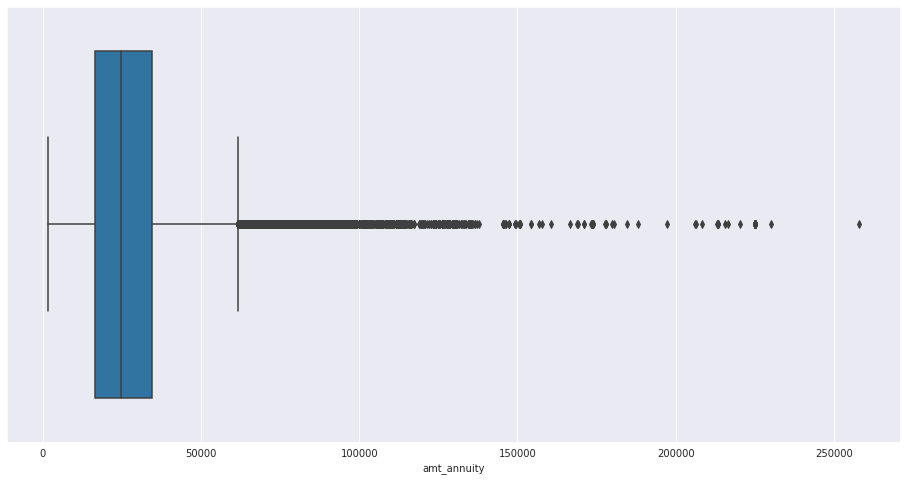

In [25]:
plt.figure(figsize = [16,8])
sns.boxplot(data0.amt_annuity)
plt.show()

'amt_annuity' is a quantitative variable and the boxplot reveals that most of the values are closely packed and therefore, it will only make sense if we impute median.

In [26]:
#imputing median
m = data0.amt_annuity.median()
data0.amt_annuity.fillna(m, inplace = True)

In [27]:
data0.amt_annuity.isna().sum()

0

In [28]:
data0.amt_goods_price.describe()  #impute median

count    3.072320e+05
mean     5.383971e+05
std      3.694467e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: amt_goods_price, dtype: float64

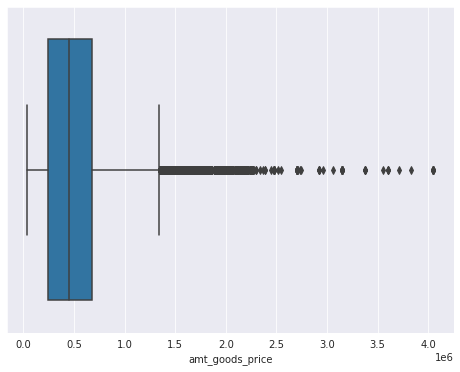

In [29]:
plt.figure(figsize = [8,6])
sns.boxplot(data0.amt_goods_price)
plt.show()

Once again, the column 'amt_goods_price' is a quantitative variable and has a tail of outliers and therefore missing values should be imputed by median.

In [30]:
#imputing median
m = data0.amt_goods_price.median()
data0.amt_goods_price.fillna(m, inplace = True)

In [31]:
data0.amt_goods_price.isna().sum()

0

In [32]:
#information on client's social surroundings
#unique value counts for following,
##observable 30 DPD default
data0.obs_30_cnt_social_circle.value_counts(normalize = True).head()

0.0    0.534799
1.0    0.159165
2.0    0.097257
3.0    0.066303
4.0    0.046146
Name: obs_30_cnt_social_circle, dtype: float64

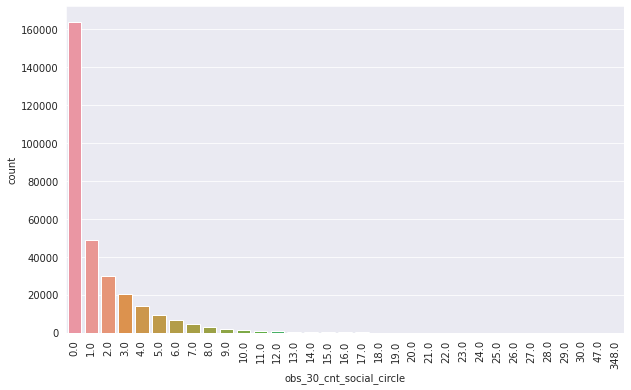

In [33]:
plt.figure(figsize = [10,6])
sns.countplot(data0.obs_30_cnt_social_circle)
plt.xticks(rotation = 90)
plt.show()

In [34]:
##defaulted on 30 DPD
data0.def_30_cnt_social_circle.value_counts(normalize = True)

0.0     0.885261
1.0     0.092428
2.0     0.017368
3.0     0.003889
4.0     0.000825
5.0     0.000183
6.0     0.000036
7.0     0.000003
34.0    0.000003
8.0     0.000003
Name: def_30_cnt_social_circle, dtype: float64

In [35]:
##observable 60 DPD default
data0.obs_60_cnt_social_circle.value_counts(normalize = True).head()

0.0    0.537266
1.0    0.159449
2.0    0.097120
3.0    0.065954
4.0    0.045503
Name: obs_60_cnt_social_circle, dtype: float64

In [36]:
##defaulted on 60 DPD
data0.def_60_cnt_social_circle.value_counts(normalize = True).head()

0.0    0.915921
1.0    0.071262
2.0    0.010343
3.0    0.001951
4.0    0.000440
Name: def_60_cnt_social_circle, dtype: float64

It looks like for most of these cutomers there were 0 observations for observable 30/60 DPD and defaulted on 30/60 DPD. Eventhough it a quantitative variable, it is descrete(counts) and the distribution is highly skewed and therefore, it makes sense to impute mode.

In [37]:
#imputing mode
data0.obs_30_cnt_social_circle.fillna(data0.obs_30_cnt_social_circle.mode()[0], inplace = True)
data0.def_30_cnt_social_circle.fillna(data0.def_30_cnt_social_circle.mode()[0], inplace = True)
data0.obs_60_cnt_social_circle.fillna(data0.obs_60_cnt_social_circle.mode()[0], inplace = True)
data0.def_60_cnt_social_circle.fillna(data0.def_60_cnt_social_circle.mode()[0], inplace = True)

From the missing number matrix representation, it's clear that the coulmns,
  '***amt_req_credit_bureau_hour***'
  '***amt_req_credit_bureau_day***'
  '***amt_req_credit_bureau_week***'
  '***amt_req_credit_bureau_mon***'
  '***amt_req_credit_bureau_qrt***'
  '***amt_req_credit_bureau_year***'
are all missing for same data objects and can be treated in same fashion.

These columns are numerical attributes with decrete values(counts) and have a highly skewed distribution, therefore, it'd make sense to impute mode of distributions in these cases.

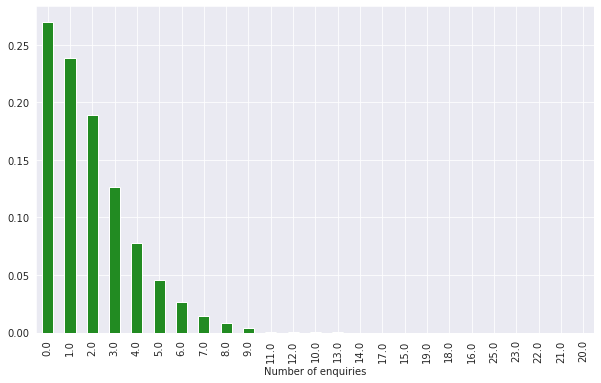

In [38]:
plt.figure(figsize = [10,6])
data0.amt_req_credit_bureau_year.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [39]:
#imputing mode
data0.amt_req_credit_bureau_year.fillna(data0.amt_req_credit_bureau_year.mode()[0], inplace = True)

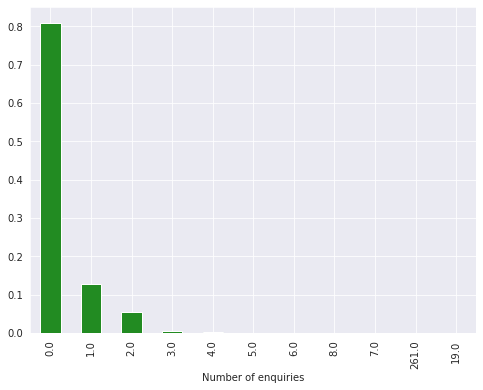

In [40]:
plt.figure(figsize = [8,6])
data0.amt_req_credit_bureau_qrt.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [41]:
#imputing mode
data0.amt_req_credit_bureau_qrt.fillna(data0.amt_req_credit_bureau_qrt.mode()[0], inplace = True)

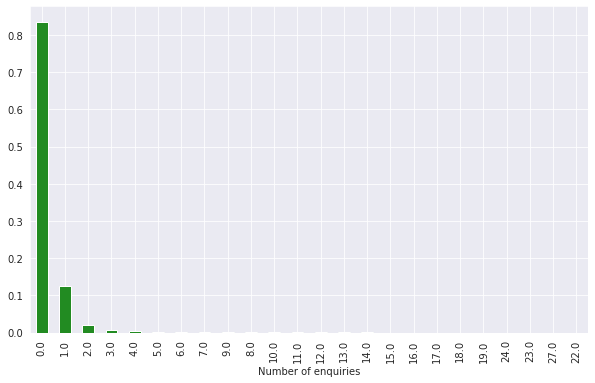

In [42]:
plt.figure(figsize = [10,6])
data0.amt_req_credit_bureau_mon.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [43]:
#imputing mode
data0.amt_req_credit_bureau_mon.fillna(data0.amt_req_credit_bureau_mon.mode()[0], inplace = True)

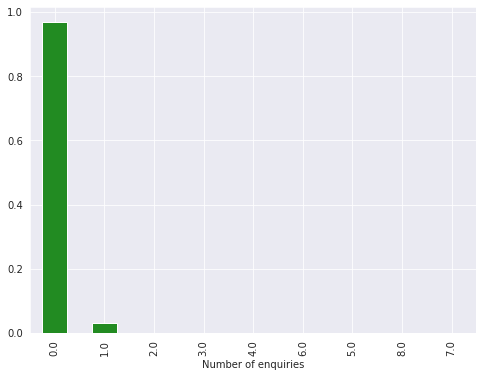

In [44]:
plt.figure(figsize = [8,6])
data0.amt_req_credit_bureau_week.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [45]:
#imputing mode
data0.amt_req_credit_bureau_week.fillna(data0.amt_req_credit_bureau_week.mode()[0], inplace = True)

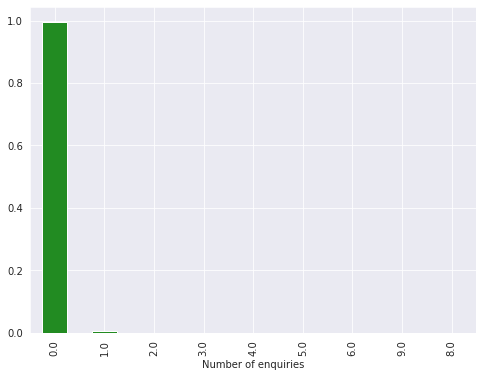

In [46]:
plt.figure(figsize = [8,6])
data0.amt_req_credit_bureau_day.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [47]:
#imputing mode
data0.amt_req_credit_bureau_day.fillna(data0.amt_req_credit_bureau_day.mode()[0], inplace = True)

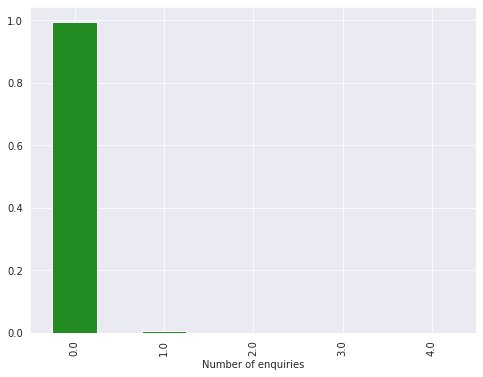

In [48]:
plt.figure(figsize = [8,6])
data0.amt_req_credit_bureau_hour.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [49]:
#imputing mode
data0.amt_req_credit_bureau_hour.fillna(data0.amt_req_credit_bureau_hour.mode()[0], inplace = True)

Dropping Useless columns: It appears that the columns, **'ext_source_1', 'ext_source_2', 'ext_source_3'** are useless columns but will not drop them and instead, we'll simply not use these for any analysis as we do not have much information on what these columns mean. As for the flag_documents columns may not be useful in EDA but can propably be important for model building.

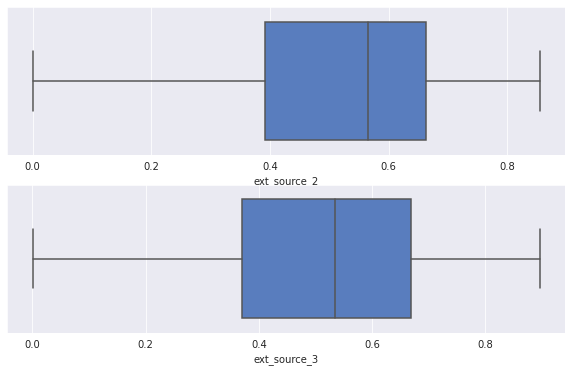

In [50]:
plt.figure(figsize = [10,6])
with plt.style.context('seaborn-muted'):
    plt.subplot(2,1,1)
    sns.boxplot(data0.ext_source_2)
    plt.subplot(2,1,2)
    sns.boxplot(data0.ext_source_3)

There are no outliers and the distribution is not too skewed so it'll be ok if we imputed 'mean' or 'median' but scince we do not know much about this varible we can just go with median.

In [51]:
data0[['ext_source_2', 'ext_source_3']].describe()

,ext_source_2,ext_source_3
count,3.068490e+05,246545.000000
mean,5.143916e-01,0.510852
std,1.910603e-01,0.194844
min,8.173617e-08,0.000527
25%,3.924574e-01,0.370650
50%,5.659614e-01,0.535276
75%,6.636171e-01,0.669057
max,8.549997e-01,0.896010


In [52]:
#imputing median
data0.ext_source_2.fillna(data0.ext_source_2.median(), inplace = True)
data0.ext_source_3.fillna(data0.ext_source_3.median(), inplace = True)

Other Categorical variables with missing values

In [53]:
#Count of all the unique categories in name_type suit column
data0.name_type_suite.value_counts(normalize = True)

Unaccompanied      0.811595
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: name_type_suite, dtype: float64

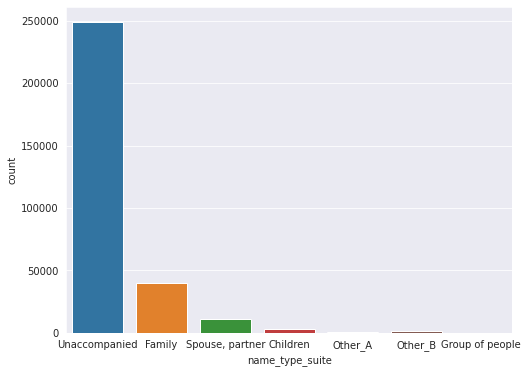

In [54]:
plt.figure(figsize = [8,6])
sns.countplot(data0.name_type_suite)

We can impute mode here as 'name_type_suit' is a catagorical variable.

In [55]:
#imputing mode
m = data0.name_type_suite.mode()[0]
data0.name_type_suite.fillna(m, inplace = True)

In [56]:
#Count of all the unique categories in occupation_type suit column
data0.occupation_type.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: occupation_type, dtype: int64

Impute missing values with top categories in existing ratio. It makes sense to do this for a column with more than 31% missing values instead of simply imputing mode.

In [57]:
#imputing missing values with top categories in existing ratio
s = data0.occupation_type.isna().sum()
data0.occupation_type.fillna(pd.Series(np.random.choice(['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers'], 
                                              p = [0.37, 0.21, 0.18, 0.14, 0.10], size = s)), inplace = True)

In [58]:
data0.occupation_type.value_counts(normalize = True)*100

Laborers                 27.457329
Sales staff              15.921180
Core staff               13.692389
Managers                 10.617851
Drivers                   8.975693
High skill tech staff     4.717939
Accountants               4.067875
Medicine staff            3.539284
Security staff            2.786403
Cooking staff             2.465103
Cleaning staff            1.929048
Private service staff     1.099471
Low-skill Laborers        0.867719
Waiters/barmen staff      0.558856
Secretaries               0.541029
Realty agents             0.311351
HR staff                  0.233409
IT staff                  0.218070
Name: occupation_type, dtype: float64

### 2.2 Inspecting Other columns, fixing invalid values and Standardising values

In [59]:
#strictly catagorical columns
data0.select_dtypes(exclude = ['float64', 'int64']).columns

Index(['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'weekday_appr_process_start', 'organization_type'],
      dtype='object')

In [60]:
data0.code_gender.value_counts()

F      202447
M      105057
XNA         4
Name: code_gender, dtype: int64

It looks like XNA is an encoding for missing values. Replacing the missing values in existing female to male ratio makes more sense than simply imputing mode.

In [61]:
#imputing mode in place of XNA in gender coulmn
#m = data0.code_gender.mode()[0]
data0.code_gender.replace({'XNA': np.random.choice(['F','M'], p = [0.65,0.35])}, inplace = True)

In [62]:
data0.code_gender.value_counts()

F    202451
M    105057
Name: code_gender, dtype: int64

In [63]:
#unique value counts
data0.organization_type.value_counts(normalize = True)*100

Business Entity Type 3    22.110644
XNA                       18.007336
Self-employed             12.491382
Other                      5.425225
Medicine                   3.639905
Business Entity Type 2     3.431455
Government                 3.383327
School                     2.891957
Trade: type 7              2.546600
Kindergarten               2.237340
Construction               2.185634
Business Entity Type 1     1.945966
Transport: type 4          1.755401
Trade: type 3              1.135255
Industry: type 9           1.095256
Industry: type 3           1.065989
Security                   1.055907
Housing                    0.961926
Industry: type 11          0.879327
Military                   0.856563
Bank                       0.815263
Agriculture                0.798028
Police                     0.761281
Transport: type 2          0.716729
Postal                     0.701445
Security Ministries        0.641935
Trade: type 2              0.617870
Restaurant                 0

Again, missing values are ancoded as 'XNA'. Replace these with np.nan.
Organisation type depends on other variables like occupation type. It can be imputed using a **decision tree classfier**. For now leave it with NAN.

In [64]:
#replacing with NAN
data0.organization_type.replace({'XNA':np.nan}, inplace = True)

In [65]:
data0.organization_type.isna().sum()

55374

In [66]:
#integer and float columns
data0.select_dtypes(include = ['float64', 'int64']).columns

Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'flag_mobil', 'flag_emp_phone',
       'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'hour_appr_process_start',
       'reg_region_not_live_region', 'reg_region_not_work_region',
       'live_region_not_work_region', 'reg_city_not_live_city',
       'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_2',
       'ext_source_3', 'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'days_last_phone_change', 'flag_document_2', 'flag_document_3',
       'flag_document_4', 'flag_document_5', 'flag_document_6',
       'flag_document_7', 'flag_document_8', 'flag_documen

Convert '***days_birth***', '***days_employed***',
       '***days_registration***', '***days_id_publish***', '***days_last_phone_change***' to a more readable format.

In [67]:
data0[[ 'days_birth', 'days_employed', 'days_registration', 'days_id_publish','days_last_phone_change']].describe()

,days_birth,days_employed,days_registration,days_id_publish,days_last_phone_change
count,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,-16037.041560,63815.673956,-4986.137584,-2994.208382,-962.860075
std,4363.980429,141276.312548,3522.896819,1509.449226,826.810973
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7480.000000,-4299.000000,-1570.000000
50%,-15750.000000,-1214.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


All the values of these columns are negative/mixed, which is absurd values for any of these variables. Assuming there was some kind of mistake in due to which all the figures are saved as negative, we can convert them to positive values.

In [68]:
#converting to absolute value
data0.days_birth = data0.days_birth.apply(lambda x: abs(x))
data0.days_employed = data0.days_employed.apply(lambda x: abs(x))
data0.days_id_publish = data0.days_id_publish.apply(lambda x: abs(x))
data0.days_last_phone_change = data0.days_last_phone_change.apply(lambda x: abs(x))
data0.days_registration = data0.days_registration.apply(lambda x: abs(x))

In [69]:
data0[[ 'days_birth', 'days_employed', 'days_registration', 'days_id_publish','days_last_phone_change']].describe()

,days_birth,days_employed,days_registration,days_id_publish,days_last_phone_change
count,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,16037.041560,67725.397378,4986.137584,2994.208382,962.860075
std,4363.980429,139444.274200,3522.896819,1509.449226,826.810973
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7480.000000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


To make these columns make more sense, we change the units from days to years.

In [70]:
#creating new columns with new unit - years
data0['years_birth'] = data0.days_birth.apply(lambda x: int(x/365))
data0['years_employed'] = data0.days_employed.apply(lambda x: int(x/365))

In [71]:
data0[['years_birth', 'years_employed']].describe()

,years_birth,years_employed
count,307508.000000,307508.000000
mean,43.436096,185.023316
std,11.954570,381.973621
min,20.000000,0.000000
25%,34.000000,2.000000
50%,43.000000,6.000000
75%,53.000000,15.000000
max,69.000000,1000.000000


### Handling Outliers

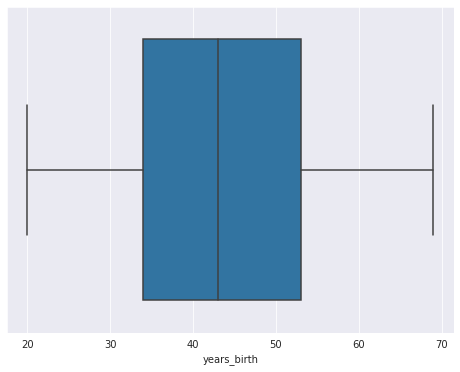

In [72]:
#Distribution of age of clients in years
plt.figure(figsize = [8,6])
sns.boxplot(data0.years_birth)
plt.show()

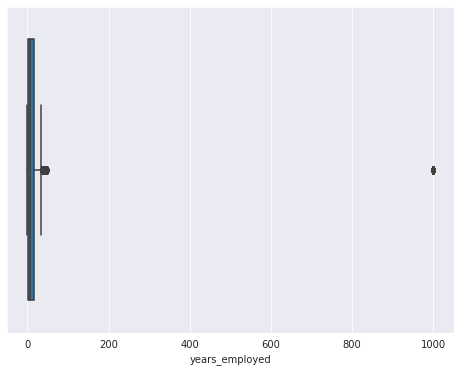

In [73]:
#distribution of number of years in current employment
plt.figure(figsize = [8,6])
sns.boxplot(data0.years_employed)
plt.show()

In [74]:
#number of data points with years_employed > 100
data0[data0.years_employed > 100].shape[0]

55374

In [75]:
data0[data0.years_employed > 100].years_employed.describe()

count    55374.0
mean      1000.0
std          0.0
min       1000.0
25%       1000.0
50%       1000.0
75%       1000.0
max       1000.0
Name: years_employed, dtype: float64

There are around 18% values in year_employed that are equal to 1000. This looks like an error. 18% is a lot of rows, so we can replace it with NAN for now as it will not affect the analysis.

In [76]:
#replacing with NAN
data0.years_employed.replace({1000: np.nan}, inplace = True)

In [77]:
#sanity check
data0[data0.years_employed > data0.years_birth]

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,years_birth,years_employed


In [78]:
data0[data0.amt_income_total > 5000000]

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,years_birth,years_employed
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,34,2.0
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,23.0
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,...,0,0,0.0,0.0,1.0,0.0,0.0,4.0,52,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,43,13.0
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,37,0.0


In [79]:
#binning amt_income_total to keep the outlier in the analysis
L = [0, 0.05, 0.2, 0.35, 0.60, 0.75, 0.95, 1]
data0.amt_income_total.quantile(L)

0.00        25650.0
0.05        67500.0
0.20        99000.0
0.35       126000.0
0.60       162000.0
0.75       202500.0
0.95       337500.0
1.00    117000000.0
Name: amt_income_total, dtype: float64

In [80]:
#Binning Age, years employed, income into buckets(for future use) to make the distribustion more easy to understand
data0['age_group'] = pd.cut(data0.years_birth, [0,25,30,35,40,45,50,55,60,65,200], labels = ['<25','25-30','30-35','35-40','40-45',
                                                                                             '45-50','50-55','55-60','60-65','>65'])
data0['income_group'] = pd.qcut(data0.amt_income_total, q = L, labels = ['very-low', 'low','low-medium', 'medium',
                                                                         'high-medium', 'high', 'very-high'])

In [81]:
data0.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,years_birth,years_employed,age_group,income_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0,<25,high-medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0,40-45,high
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,52,0.0,50-55,very-low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,52,8.0,50-55,medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,54,8.0,50-55,low-medium


## 3. Analysis

In [82]:
data0.target.value_counts()

0    282683
1     24825
Name: target, dtype: int64

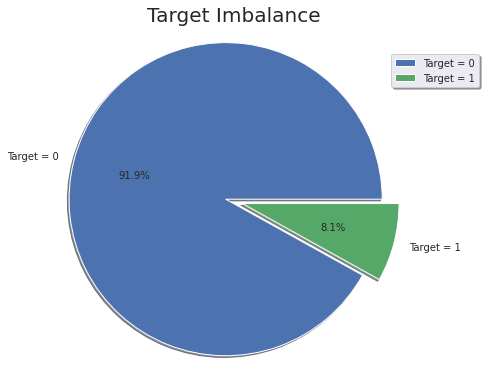

In [83]:
#Visualizing imabalance in the target variable
with plt.style.context('seaborn-deep'):
    explode = (0.1, 0.1)
    plt.pie(data0.target.value_counts(), labels = ['Target = 0','Target = 1'], explode = explode, radius = 1.8, autopct='%0.1f%%', shadow = True)
    plt.title('Target Imbalance', fontsize = 20, y = 1.3)
    plt.legend(bbox_to_anchor=(1.2, 1.2), fancybox=True, shadow=True)
    plt.show()

The imbalance in Target variable is apparent. 91.9% clients have no default histoy and 8.1% have default history.

### 3.1 Univariate Analysis

In this we will analyse individual variables with respect to target variable.

In [84]:
#segmenting the dataset with respect to target variable
T0 = data0.loc[data0.target == 0]
T1 = data0.loc[data0.target == 1]

In [85]:
#Function for visualizing catagorical variables
def cat_plot(x):
    plt.subplot(1,2,1)
    cnt1 = sns.countplot(T0[x], palette = 'hls', order = T0[x].value_counts().index)
    plt.xticks(rotation = 45)
    cnt1.set_title('{} composition of Non-Defaulters'.format(x), fontsize = 16)
    for k in cnt1.patches:
        cnt1.annotate('{:.1f}%'.format(k.get_height()/T0.shape[0]*100),(k.get_x()+0.1, k.get_height()))
    plt.subplot(1,2,2) 
    cnt2 = sns.countplot(T1[x], palette = 'hls', order = T1[x].value_counts().index)
    plt.xticks(rotation = 45)
    cnt2.set_title('{} composition of Defaulters'.format(x), fontsize = 16)
    for k in cnt2.patches:
        cnt2.annotate('{:.1f}%'.format(k.get_height()/T1.shape[0]*100),(k.get_x()+0.2, k.get_height()))

#### Catagorical Unordered univariate analysis

In [86]:
T0.code_gender.value_counts(normalize = True)*100

F    66.604996
M    33.395004
Name: code_gender, dtype: float64

In [87]:
T1.code_gender.value_counts(normalize = True)*100

F    57.079557
M    42.920443
Name: code_gender, dtype: float64

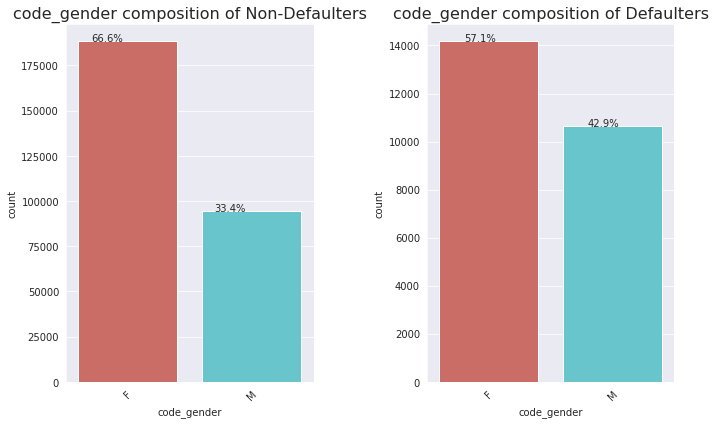

In [88]:
#gender composition in both groups
plt.figure(figsize = [10, 6])
cat_plot('code_gender')
plt.tight_layout()


> Gender composition of Defaulter and Non-Defaulters are different. It looks like there are more Female clients in both the cases which indicates that more women apply for loan than men and also that women are less likely to default.






In [89]:
#Income source composition of both groups
##Non-Defauters
T0.name_income_type.value_counts(normalize = True)*100

Working                 50.780910
Commercial associate    23.437915
Pensioner               18.529590
State servant            7.235667
Student                  0.006368
Unemployed               0.004953
Businessman              0.003538
Maternity leave          0.001061
Name: name_income_type, dtype: float64

In [90]:
##Defaulters
T1.name_income_type.value_counts(normalize = True)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: name_income_type, dtype: float64

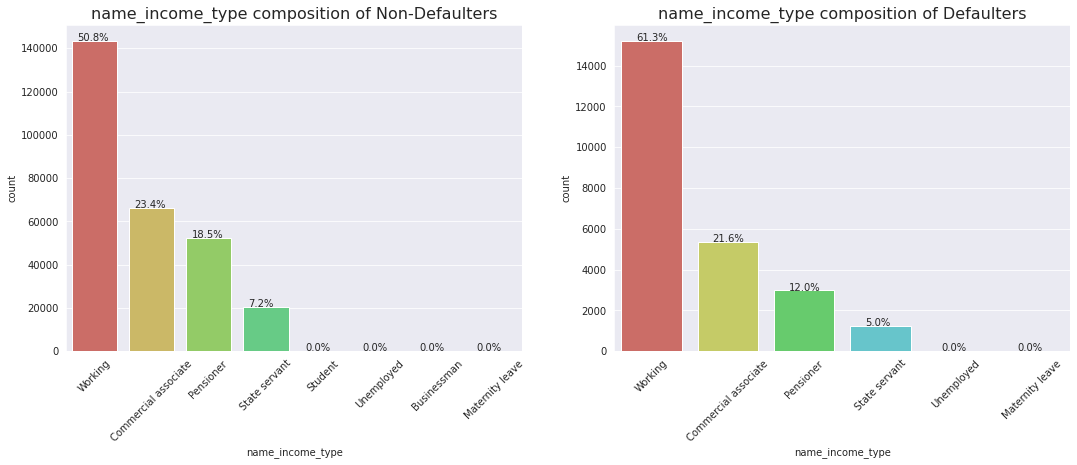

In [91]:
plt.figure(figsize = [18, 6])
cat_plot('name_income_type')

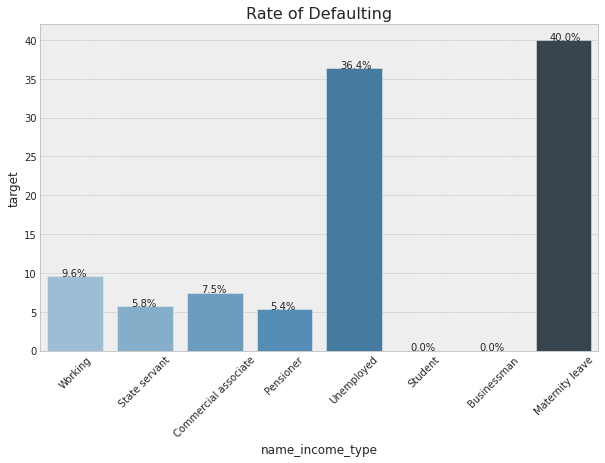

In [92]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same income type)
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.name_income_type, data0.target*100, palette="Blues_d", ci = False)
    plt.title('Rate of Defaulting', fontsize = 16)
    plt.xticks(rotation = 45)
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))



> There is a consistency in the overall composition here. When we compare Defaulters to Non-defaulters, there is a decrease in percentage Commercial asociates, pensioners and state servants but an increase in working class percentage, indicating that this group is more likely to default.


> The categories, Unemployed and and Maternity leave have a high rate of default but we can not conclusively say anything about these groups as we have very less data corresponding to these two categories.




In [93]:
#Type of organisation that the client works in, in both groups
##Non-defaulters
T0.organization_type.value_counts(normalize = True).mul(100).head(10)

Business Entity Type 3    26.777798
Self-employed             14.982262
Other                      6.690433
Medicine                   4.540185
Government                 4.202363
Business Entity Type 2     4.191073
School                     3.633103
Trade: type 7              3.079041
Kindergarten               2.777259
Construction               2.577519
Name: organization_type, dtype: float64

In [94]:
##Defaulters
T1.organization_type.value_counts(normalize = True).mul(100).head(10)

Business Entity Type 3    28.958095
Self-employed             17.897870
Other                      5.839249
Business Entity Type 2     4.121823
Construction               3.595145
Trade: type 7              3.389054
Medicine                   3.375315
Government                 3.324937
School                     2.408976
Transport: type 4          2.294481
Name: organization_type, dtype: float64

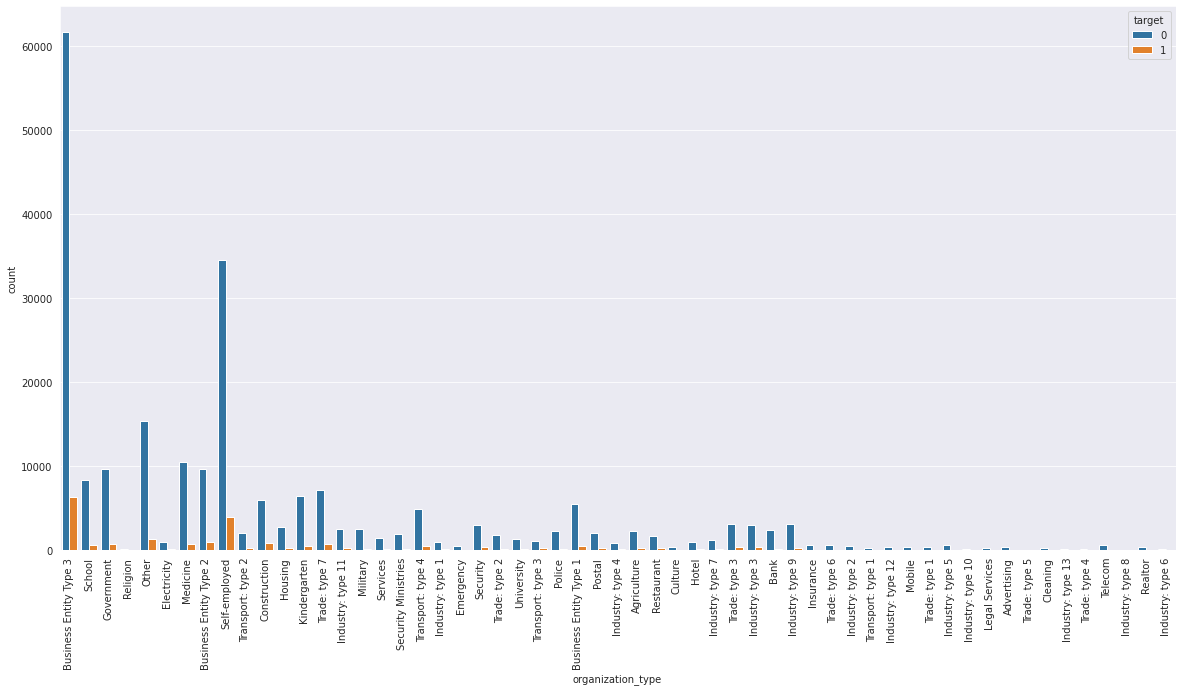

In [95]:
plt.figure(figsize = [20, 10])
sns.countplot(data0['organization_type'], hue = data0.target)
plt.xticks(rotation = 90)
plt.show()

<Figure size 1152x576 with 0 Axes>

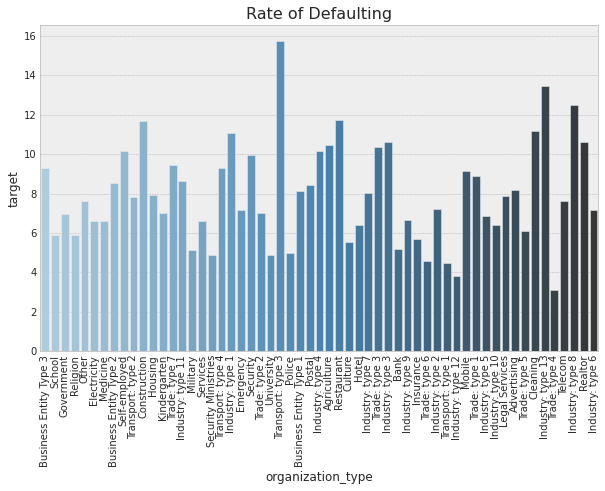

In [96]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same organization type)
plt.figure(figsize = [16, 8])
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.organization_type, data0.target*100, capsize=.1, palette="Blues_d", ci = None)
    plt.title('Rate of Defaulting', fontsize = 16)
    plt.xticks(rotation = 90)



> Looks like transport type 2 has the highest defaulting rate. Few other organization type also have high default rate but we can not concusively say about them as there are relatively very less data points corresponding to those organisation types.



In [97]:
#Family status of clients in both groups
##Non-Defaulters
T0.name_family_status.value_counts(normalize = True)*100

Married                 64.234850
Single / not married    14.499280
Civil marriage           9.485537
Separated                6.420620
Widow                    5.359714
Name: name_family_status, dtype: float64

In [98]:
##Defaulters
T1.name_family_status.value_counts(normalize = True)*100

Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: name_family_status, dtype: float64

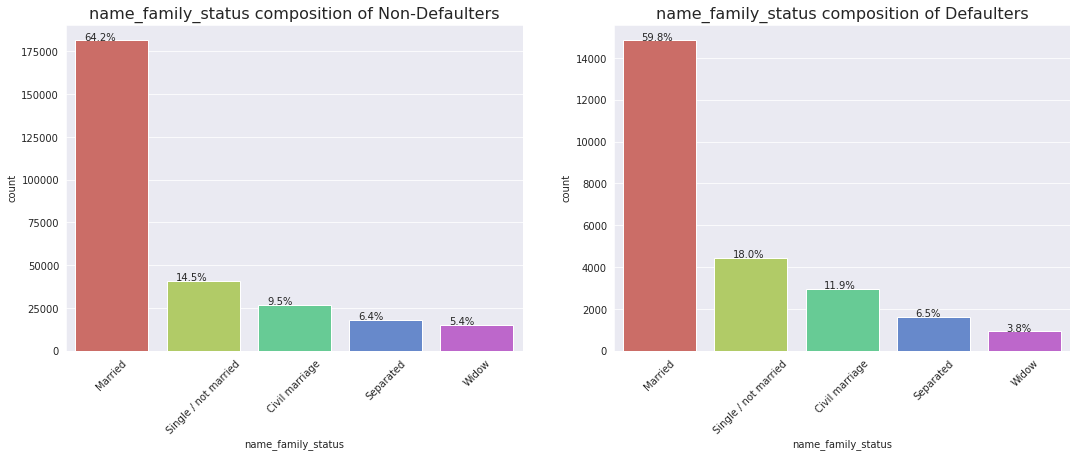

In [99]:
plt.figure(figsize = [18, 6])
cat_plot('name_family_status')

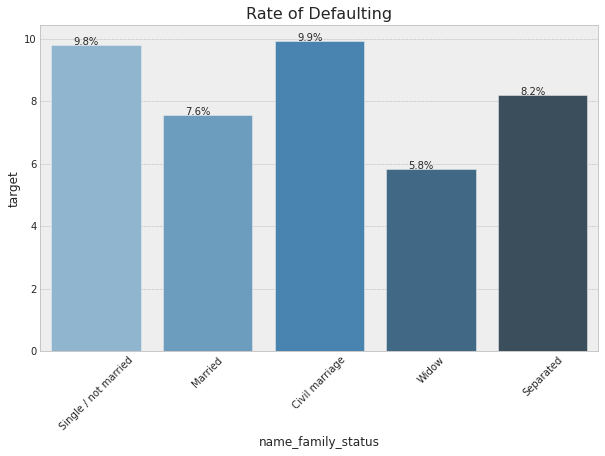

In [100]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same family status)
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.name_family_status, data0.target*100, palette="Blues_d", ci = False)
    plt.title('Rate of Defaulting', fontsize = 16)
    plt.xticks(rotation = 45)
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))

> Percentage composition of married people is more than 50 in cases, whcih in indicates that married people apply for loans more than other categories.



>Percentage composition of categories, single/non-married, civil marriage increases from 14.5% and 9.5% in Non-defaulters to 18.0% and 11.9% in Defaulters(Clients with payment difficulties). These groups should be scrutinized.








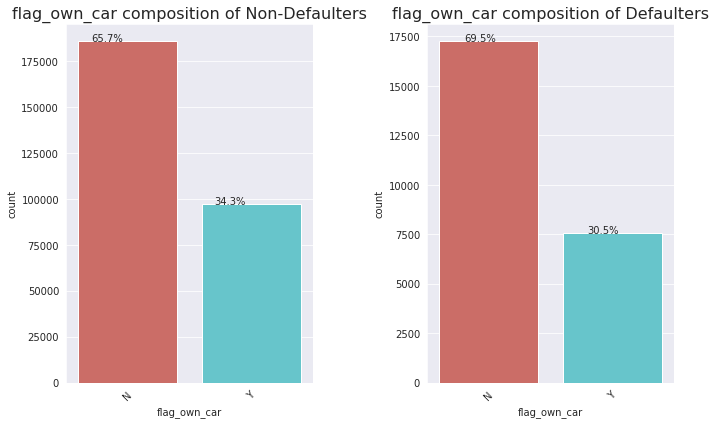

In [101]:
#Composition of clients who own and do not own a car in both groups
plt.figure(figsize = [10, 6])
cat_plot('flag_own_car')
plt.tight_layout()



> No significant change in composition here. Slight increase(65.7% -> 69.5) in percentage of people wo don't own a car and a slight decrease(34.3 -> 30.5) in percentage of people who own a car from Non-defaulters to Defaulters. This means that people who own a car are relatively less likely to default.



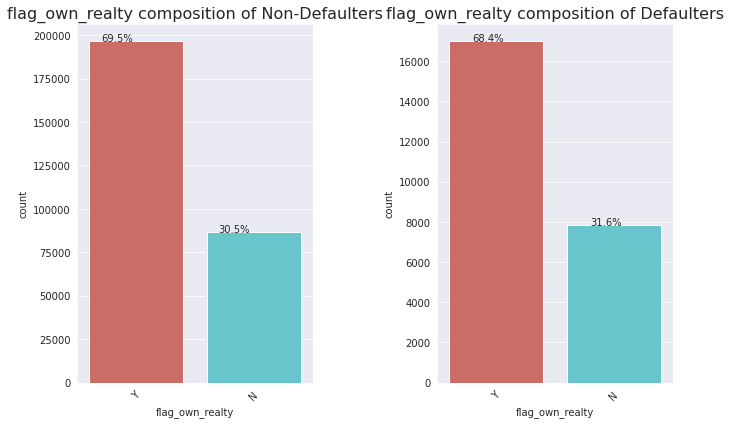

In [102]:
#Composition of clients who own and do not own a flat or house in both groups
plt.figure(figsize = [10, 6])
cat_plot('flag_own_realty')
plt.tight_layout()



> It looks like more than two-thirds of the people who apply for loans own a flat/house. There is not significant change in composition of the two.



In [103]:
T0.flag_own_realty.value_counts(normalize = True)*100

Y    69.45094
N    30.54906
Name: flag_own_realty, dtype: float64

In [104]:
#Housing type of clients in both groups
##Non-defaulters
T0.name_housing_type.value_counts(normalize = True)*100

House / apartment      89.002169
With parents            4.635581
Municipal apartment     3.617833
Rented apartment        1.514063
Office apartment        0.864926
Co-op apartment         0.365427
Name: name_housing_type, dtype: float64

In [105]:
#Defaulters
T1.name_housing_type.value_counts(normalize = True)*100

House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: name_housing_type, dtype: float64

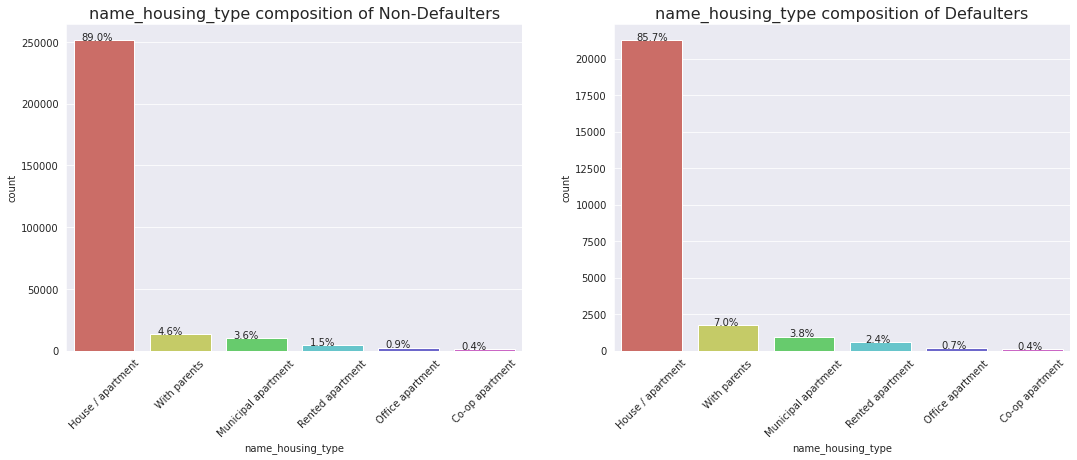

In [106]:
plt.figure(figsize = [18, 6])
cat_plot('name_housing_type')

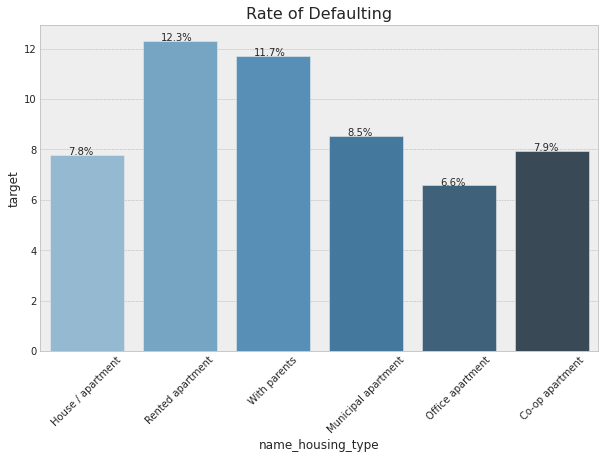

In [107]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same housing type)
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.name_housing_type, data0.target*100, palette="Blues_d", ci = False)
    plt.title('Rate of Defaulting', fontsize = 16)
    plt.xticks(rotation = 45)
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))



> We can infer from this chart that most loan applicant live in their own apartment/house. This is probably due to high cost of maintainance.



> Rate of defaulting is highest for people living in rented appartments and with parents. It is least for people living in office apartments.



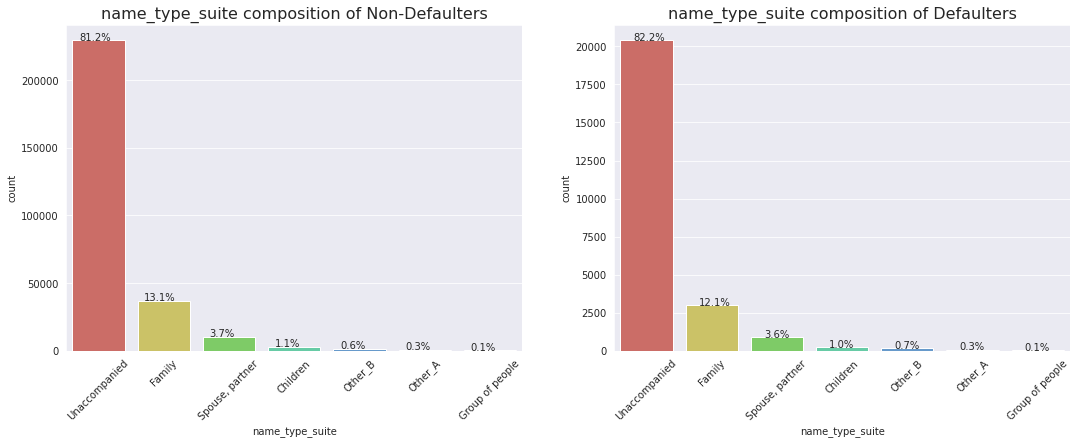

In [108]:
#Name_type_suite: Who was accompanying client when he was applying for the loan
plt.figure(figsize = [18, 6])
cat_plot('name_type_suite')



> It looks like there's no notable change in who accompanied the client during application.



#### Catagorical Ordered Univariate Analysis

In [109]:
#Level of Highest education of clients in both groups
##Non-defaulters
T0.name_education_type.value_counts(normalize = True)*100

Secondary / secondary special    70.349826
Higher education                 25.064472
Incomplete higher                 3.326695
Lower secondary                   1.202053
Academic degree                   0.056954
Name: name_education_type, dtype: float64

In [110]:
#Defaulters
T1.name_education_type.value_counts(normalize = True)*100

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: name_education_type, dtype: float64

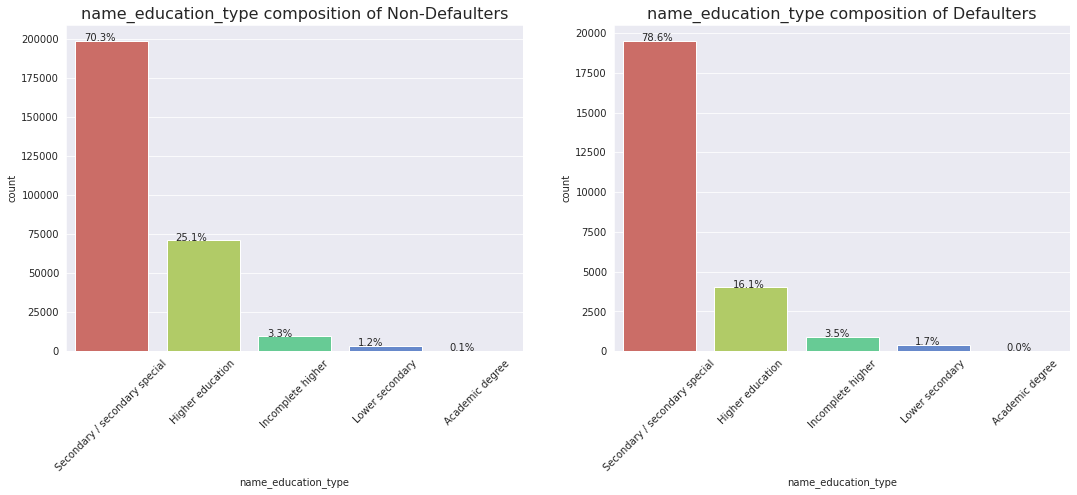

In [111]:
plt.figure(figsize = [18, 6])
cat_plot('name_education_type')

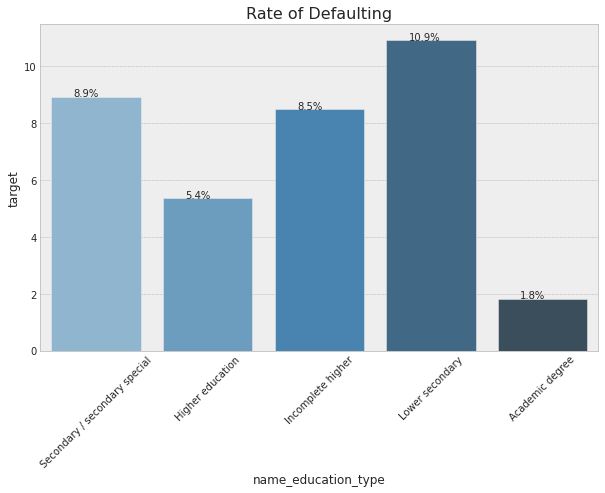

In [112]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same highest level of education)
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.name_education_type, data0.target*100, palette="Blues_d", ci = False)
    plt.title('Rate of Defaulting', fontsize = 16)
    plt.xticks(rotation = 45)
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))



> Percentage composition of people with secondary education is highest in both groups, indicating that people with secondary education apply for loan much more than others.


> Percentage of people with higher education decreases from 25.1% in Non-defaulters to 16.1% in Defaulters. People in this category are less likely to default.






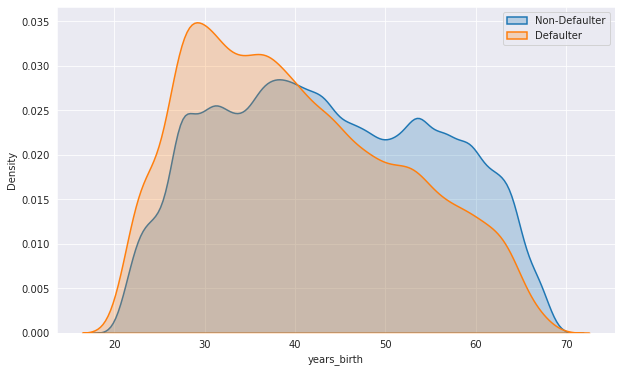

In [113]:
#Age of Applicants
#Age is not a catagorical variable but has been visualized here so that age analysis stays in one place. 
plt.figure(figsize = [10,6])
sns.kdeplot(T0.years_birth, fill = True, linewidth = 1.5, label = 'Non-Defaulter')
sns.kdeplot(T1.years_birth, fill = True, linewidth = 1.5, label = 'Defaulter')
plt.legend()



> From the Age density plot, it looks like people in range 25-45 tend to apply for loan more than much youger and older people.

> Also, it's clear that young people default more than older people.





In [114]:
data0.years_birth.unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

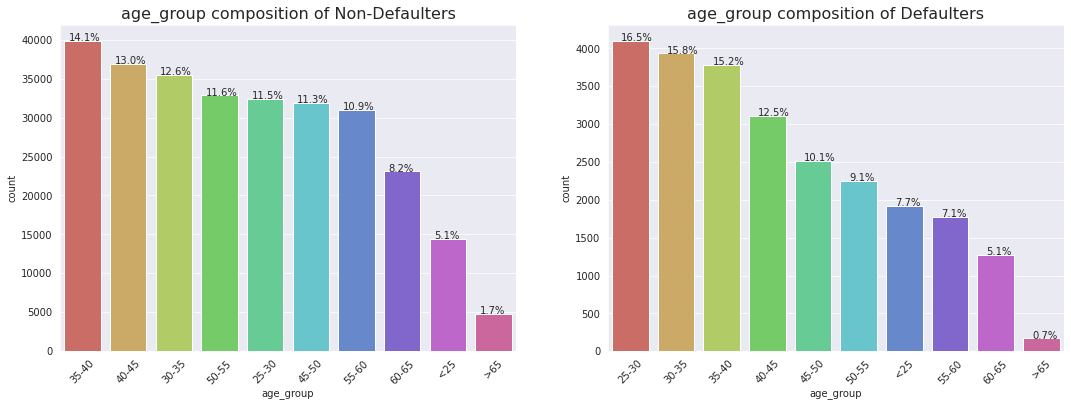

In [115]:
plt.figure(figsize = [18, 6])
plt.subplot(1,2,1)
cat_plot('age_group')

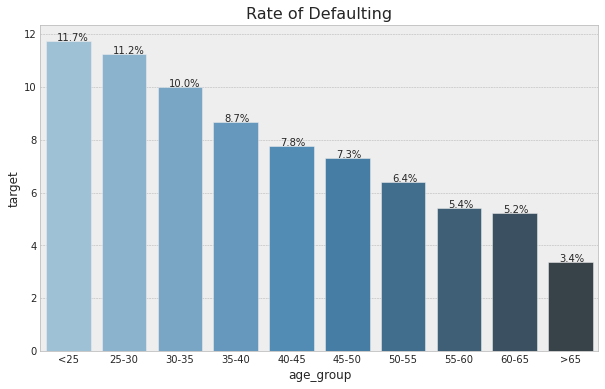

In [116]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants in that age group)
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.age_group, data0.target*100, palette="Blues_d", ci = False)
    plt.title('Rate of Defaulting', fontsize = 16)
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))



> We get a very clear trend with respect to age groups here. Younger people are more likely to default that older people.



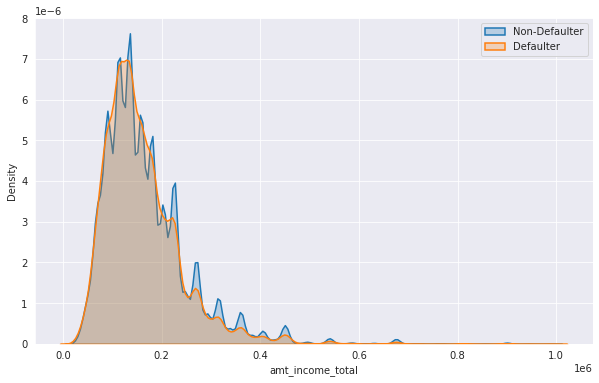

In [117]:
#Income of Applicants
#Income is not a catagorical variable but has been visualized here so that income analysis stays in one place.
##plotting excluding some outliers
plt.figure(figsize = [10,6])
sns.kdeplot(T0.amt_income_total[T0.amt_income_total < 1000000], fill = True, linewidth = 1.5, label = 'Non-Defaulter')
sns.kdeplot(T1.amt_income_total[T1.amt_income_total < 1000000], fill = True, linewidth = 1.5, label = 'Defaulter')
plt.legend()

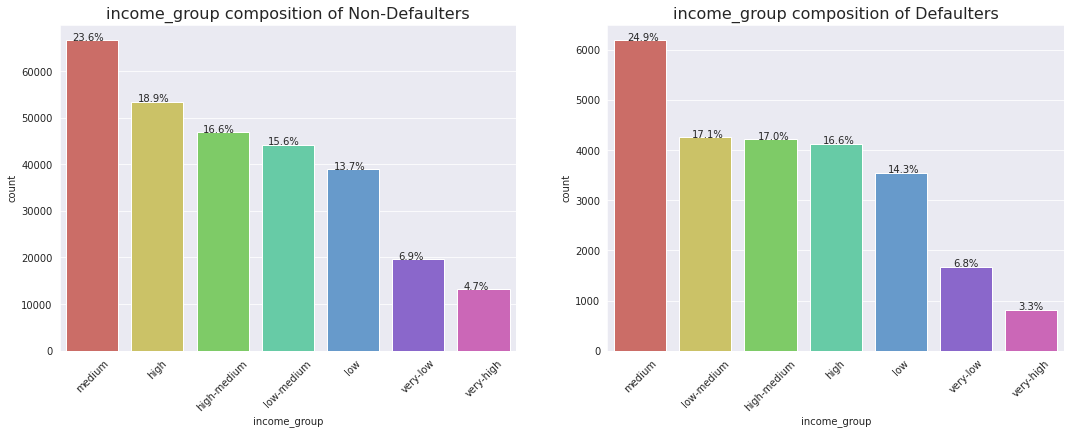

In [118]:
plt.figure(figsize = [18, 6])
cat_plot('income_group')

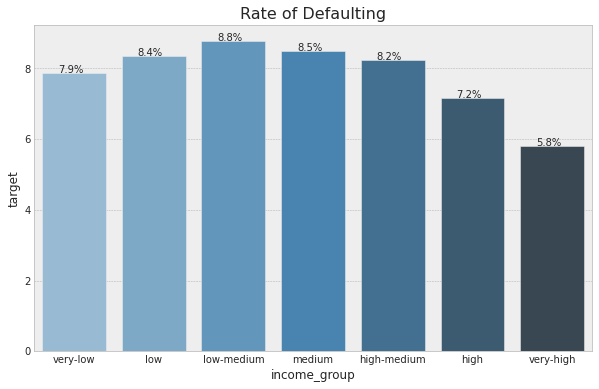

In [119]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants in that income group)
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.income_group, data0.target*100, palette="Blues_d", ci = False)
    plt.title('Rate of Defaulting', fontsize = 16)
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))



> It's looks like people with higher income are less likely to default and understandably so. People with low income are also better relatively to the mid range income groups. This is probably because their loans are smaller.



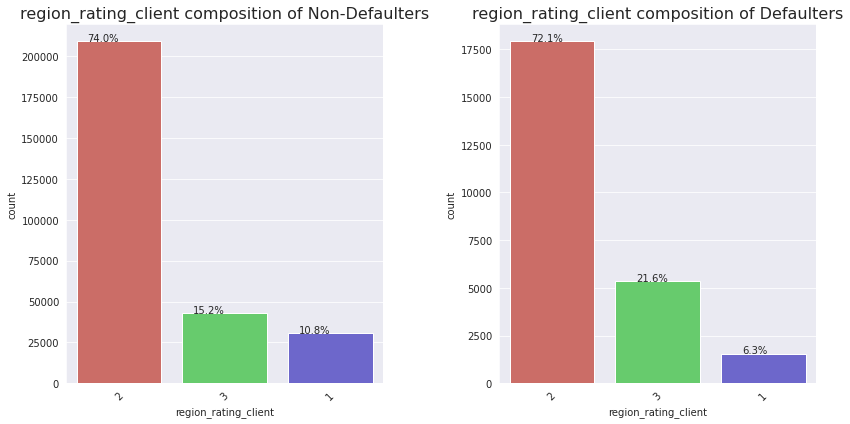

In [120]:
#Region rating of the region where client lives
plt.figure(figsize = [12, 6])
cat_plot('region_rating_client')
plt.tight_layout()

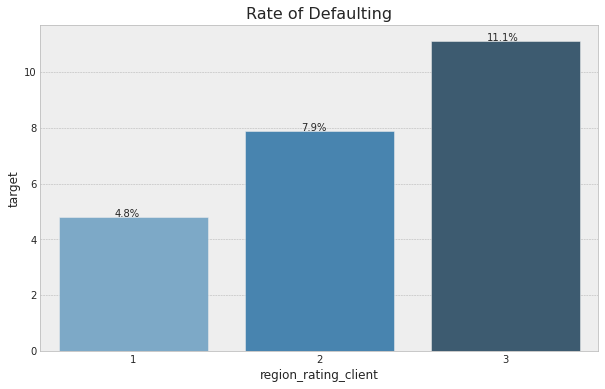

In [121]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants in with same region rating)
with plt.style.context('bmh'):
    plt.figure(figsize = [10,6])
    cnt = sns.barplot(data0.region_rating_client, data0.target*100, palette="Blues_d", ci = False)
    plt.title('Rate of Defaulting', fontsize = 16)
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.3, k.get_height()))



> Most of the clients applying for the loan appear to be from regions with rating 2.

> From the data, it looks like people from regions with rating 1 are less likely to default and those from regions with rating 3 are relatively more likely to default.





Age and Income have already been visualised earlier as continuous variables and also as catagorical.
We will visualize other quantitative variables with respect to target.

### 3.2 Bivariate and Multivariate Analysis

#### Numeric to numeric analysis

In [122]:
#List of columns with data type integer or float
data0.select_dtypes(include = ['int64', 'float64']).columns

Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'flag_mobil', 'flag_emp_phone',
       'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'hour_appr_process_start',
       'reg_region_not_live_region', 'reg_region_not_work_region',
       'live_region_not_work_region', 'reg_city_not_live_city',
       'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_2',
       'ext_source_3', 'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'days_last_phone_change', 'flag_document_2', 'flag_document_3',
       'flag_document_4', 'flag_document_5', 'flag_document_6',
       'flag_document_7', 'flag_document_8', 'flag_documen



> A lot of inferences can be made here if we observe closely, like amt_goods_price and total income have negligible correlation for defaulters and a weak correlation for Non-defaulters.



Plotting heatmap of correlation matrix of relevant numerical variables for both defaulter and Non-defaulters.

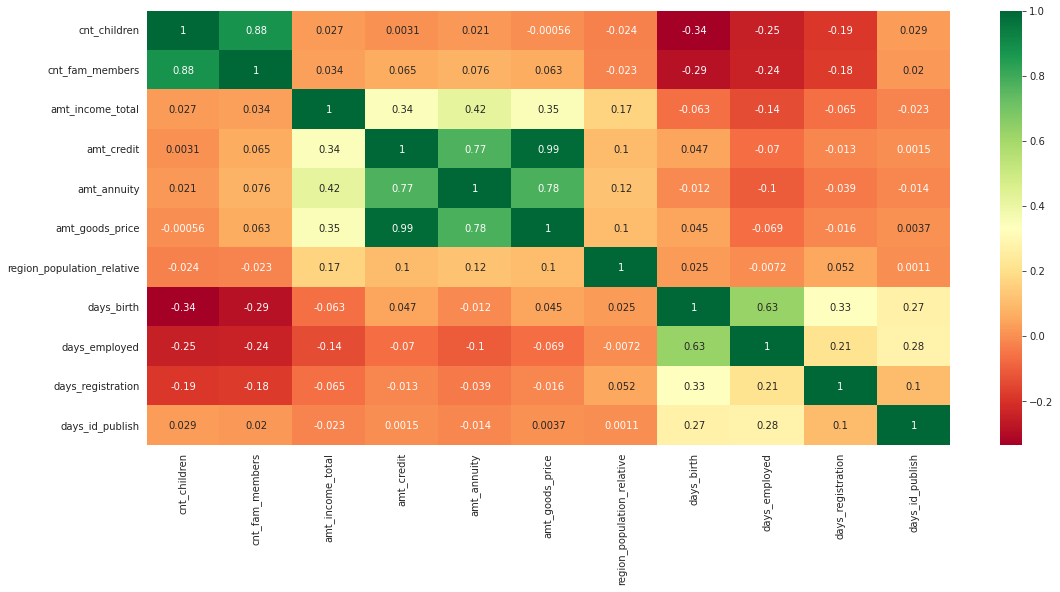

In [123]:
##Non-defaulters
plt.figure(figsize = [18,8])
sns.heatmap(T0[['cnt_children', 'cnt_fam_members', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed','days_registration', 
       'days_id_publish']].corr(), cmap = 'RdYlGn', annot = True)

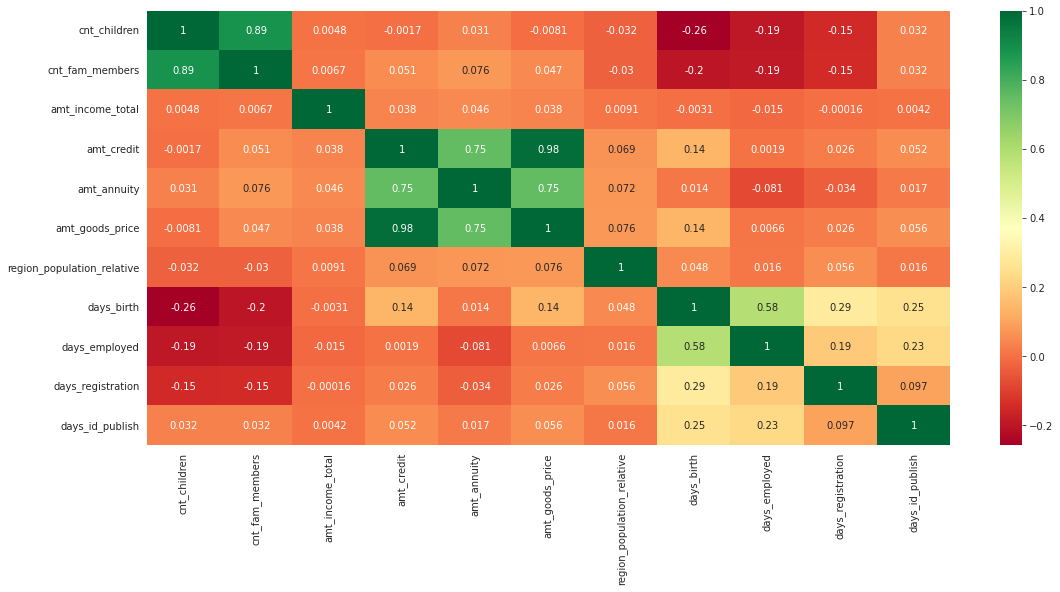

In [124]:
plt.figure(figsize = [18,8])
sns.heatmap(T1[['cnt_children', 'cnt_fam_members', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed','days_registration', 
       'days_id_publish']].corr(), cmap = 'RdYlGn', annot = True)

#### Catagorical variables Analysis

In [125]:
#List of columns with non numeric data type. (There are few other catagorical varibles with numeric data type too)
data0.select_dtypes(exclude = ['int64', 'float64']).columns

Index(['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'weekday_appr_process_start', 'organization_type', 'age_group',
       'income_group'],
      dtype='object')

Percentage or proportion of clients with default history/ payment difficulty in the data for different combination of qualitative variables.

In [126]:
#gender, education
data0.groupby(['name_education_type','code_gender']).target.mean().unstack()

code_gender,F,M
name_education_type,,
Academic degree,0.030000,0.000000
Higher education,0.048480,0.063932
Incomplete higher,0.080204,0.092184
Lower secondary,0.092601,0.134973
Secondary / secondary special,0.076749,0.113622




> It looks like men with lower secondary education and secondary/secondary special education are more likely to default



In [127]:
#gender, income group
data0.groupby(['income_group','code_gender']).target.mean().unstack()

code_gender,F,M
income_group,,
very-low,0.072520,0.112224
low,0.075249,0.115778
low-medium,0.076750,0.118622
medium,0.070846,0.111830
high-medium,0.066704,0.105248
high,0.061112,0.084216
very-high,0.050692,0.064852




> Data suggests that men in lower to medium income group are more likely to default.



In [128]:
#gender, age-group, education
table0 = data0.groupby(['code_gender','age_group','name_education_type']).target.mean().unstack()

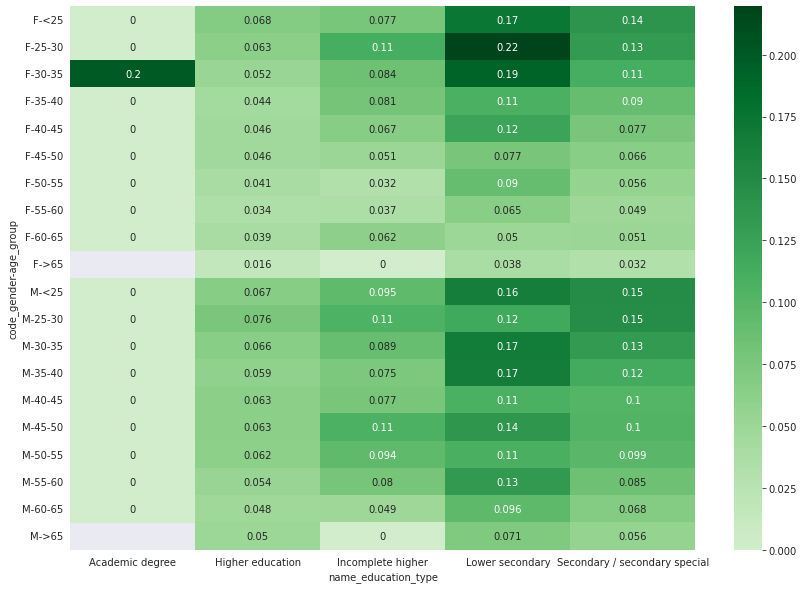

In [129]:
plt.figure(figsize = [14,10])
sns.heatmap(table0, cmap = 'Greens', annot = True, center = 0.0807)



> It's apparent here that females in age group 25-30 and 30-35 with lower secomdary education, and men in age group 30-35 and 35-40 are more likely to default or have payment difficulties.



In [130]:
#gender, housing type, family status
table1 = data0.groupby(['code_gender','name_housing_type','name_family_status']).target.mean().unstack()

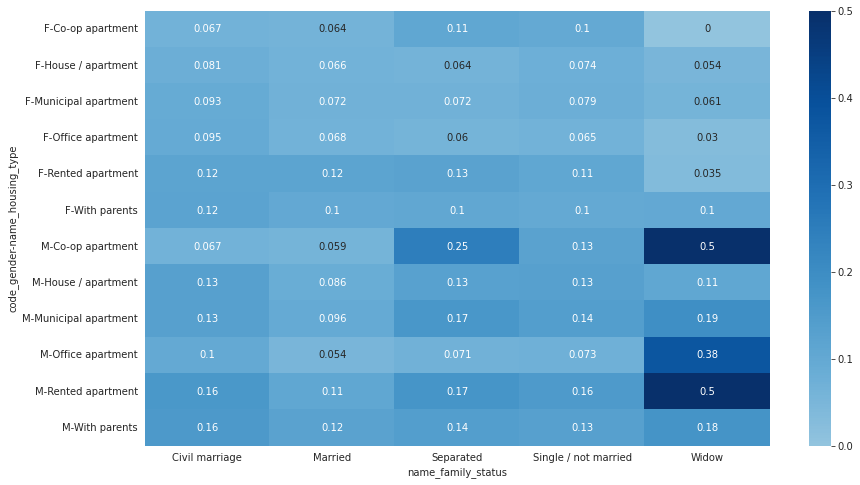

In [131]:
plt.figure(figsize = [14,8])
sns.heatmap(table1, cmap = 'Blues', annot = True, center = 0.0807)



> It's clear that men who are widows living in Co-op apartment or rented apartment are more likely to default that any other group in the above heatmap. Also, Men who are widows and live in office apartments, and men who are seperated living in co-op appartmrnts need to to be scrutinised.



Top 10 correlation for the Client with payment difficulties and all other cases (Target variable).

In [132]:
#top 10 corelations of relevant numerical variables
cols = ['cnt_children', 'cnt_fam_members', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price', 'region_population_relative',
        'region_rating_client', 'region_rating_client_w_city', 'days_birth', 'days_employed','days_registration', 'days_id_publish']
##Non-defaulters
corr = T0[cols].corr()
corr_matrix0 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_matrix0.columns = ['variable_1', 'variable_2', 'correlation_coeff']
corr_matrix0 = corr_matrix0.loc[corr_matrix0.variable_1 != corr_matrix0.variable_2]
corr_matrix0.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
corr_matrix0['abs_correlation_coeff'] = corr_matrix0['correlation_coeff'].abs()
corr_matrix0.sort_values('abs_correlation_coeff', ascending = False, inplace = True)

In [133]:
corr_matrix0.head(10)

,variable_1,variable_2,correlation_coeff,abs_correlation_coeff
68,amt_goods_price,amt_credit,0.987022,0.987022
111,region_rating_client_w_city,region_rating_client,0.950149,0.950149
13,cnt_fam_members,cnt_children,0.878572,0.878572
69,amt_goods_price,amt_annuity,0.776423,0.776423
55,amt_annuity,amt_credit,0.771298,0.771298
139,days_employed,days_birth,0.626114,0.626114
97,region_rating_client,region_population_relative,-0.539006,0.539006
110,region_rating_client_w_city,region_population_relative,-0.537302,0.537302
54,amt_annuity,amt_income_total,0.418949,0.418949
67,amt_goods_price,amt_income_total,0.349432,0.349432


In [134]:
##Defaulters
corr = T1[cols].corr()
corr_matrix1 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_matrix1.columns = ['variable_1', 'variable_2', 'correlation_coeff']
corr_matrix1 = corr_matrix1.loc[corr_matrix1.variable_1 != corr_matrix1.variable_2]
corr_matrix1.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
corr_matrix1['abs_correlation_coeff'] = corr_matrix1['correlation_coeff'].abs()
corr_matrix1.sort_values('abs_correlation_coeff', ascending = False, inplace = True)

In [135]:
corr_matrix1.head(10)

,variable_1,variable_2,correlation_coeff,abs_correlation_coeff
68,amt_goods_price,amt_credit,0.982783,0.982783
111,region_rating_client_w_city,region_rating_client,0.956637,0.956637
13,cnt_fam_members,cnt_children,0.885484,0.885484
69,amt_goods_price,amt_annuity,0.752295,0.752295
55,amt_annuity,amt_credit,0.752195,0.752195
139,days_employed,days_birth,0.582185,0.582185
110,region_rating_client_w_city,region_population_relative,-0.446977,0.446977
97,region_rating_client,region_population_relative,-0.443236,0.443236
152,days_registration,days_birth,0.289114,0.289114
117,days_birth,cnt_children,-0.259109,0.259109


### 3.3 Previous Application dataset

Rudimentary inspection of dataset

In [136]:
data1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
#changing column names to lower-case for convinience
data1.columns = data1.columns.map(lambda x: str(x).lower())

In [138]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   sk_id_prev                   1670214 non-null  int64  
 1   sk_id_curr                   1670214 non-null  int64  
 2   name_contract_type           1670214 non-null  object 
 3   amt_annuity                  1297979 non-null  float64
 4   amt_application              1670214 non-null  float64
 5   amt_credit                   1670213 non-null  float64
 6   amt_down_payment             774370 non-null   float64
 7   amt_goods_price              1284699 non-null  float64
 8   weekday_appr_process_start   1670214 non-null  object 
 9   hour_appr_process_start      1670214 non-null  int64  
 10  flag_last_appl_per_contract  1670214 non-null  object 
 11  nflag_last_appl_in_day       1670214 non-null  int64  
 12  rate_down_payment            774370 non-nu

In [139]:
#Replacing 'XNA' and 'XAP' with NaN
data1.replace({'XNA':np.nan, 'XAP':np.nan}, inplace = True)

In [140]:
data1.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval'],
      dtype='object')

#### Analysing catagorical Variables

In [141]:
#Function for visualizing composition of categories of different qualitative variables
def cat_plotp(x):
    with plt.style.context('seaborn-muted'):
        cnt1 = sns.countplot(data1[x], order = data1[x].value_counts().index)
        plt.xticks(rotation = 45, ha = 'right')
        cnt1.set_title('Distribution plot of {}'.format(x), fontsize = 16)
        for k in cnt1.patches:
            cnt1.annotate('{:.1f}%'.format(k.get_height()/data1[x].notnull().sum()*100),(k.get_x()+0.1, k.get_height()))
    plt.show()

In [142]:
#Contract status of previous application
data1.name_contract_status.value_counts(normalize = True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: name_contract_status, dtype: float64

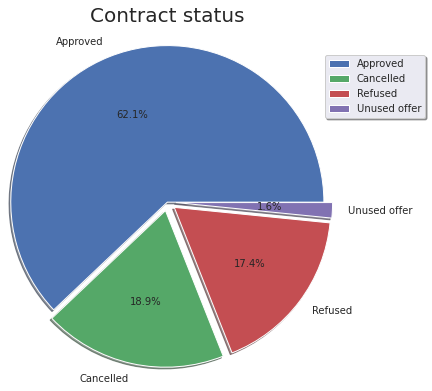

In [143]:
with plt.style.context('seaborn-deep'):
    explode = (0, 0.1, 0.1, 0.1)
    plt.pie(data1.name_contract_status.value_counts(), labels = ['Approved', 'Cancelled', 'Refused', 'Unused offer'], explode = explode, radius = 1.8, autopct='%0.1f%%', shadow = True)
    plt.title('Contract status', fontsize = 20, y = 1.3)
    plt.legend(bbox_to_anchor=(1.2, 1.2), fancybox=True, shadow=True)
    plt.show()

In [144]:
data1.name_cash_loan_purpose.notnull().sum()

69635

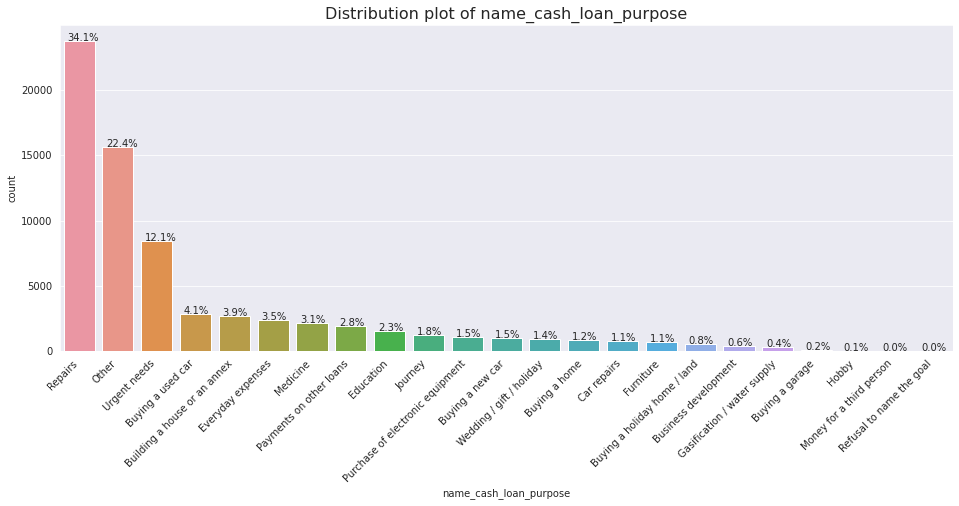

In [145]:
#Purpose of cash loan
plt.figure(figsize = [16,6])
cat_plotp('name_cash_loan_purpose')

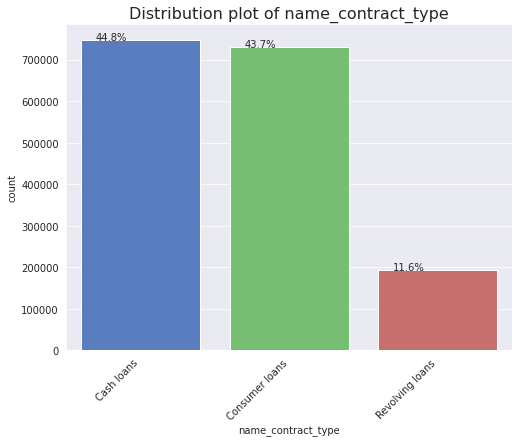

In [146]:
#Contract product type of previous application
plt.figure(figsize = [8,6])
cat_plotp('name_contract_type')

In [147]:
#Payment method that the client chose to pay for the previous application
data1.name_payment_type.value_counts(normalize = True).mul(100)

Cash through the bank                        99.110306
Non-cash from your account                    0.785651
Cashless from the account of the employer     0.104044
Name: name_payment_type, dtype: float64



>Almost all the payemnts (99.1%) were made by Cash through bank.



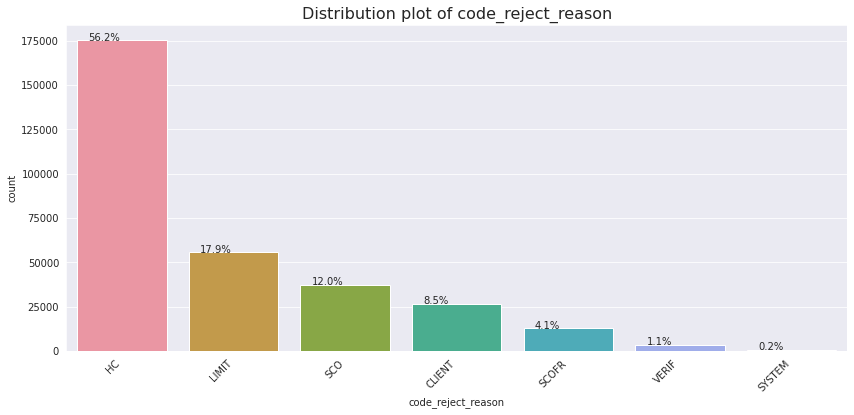

In [148]:
#Reasons for why the previous application wa rejected
plt.figure(figsize = [14,6])
cat_plotp('code_reject_reason')



> HC is appears to be main reason for reject of application



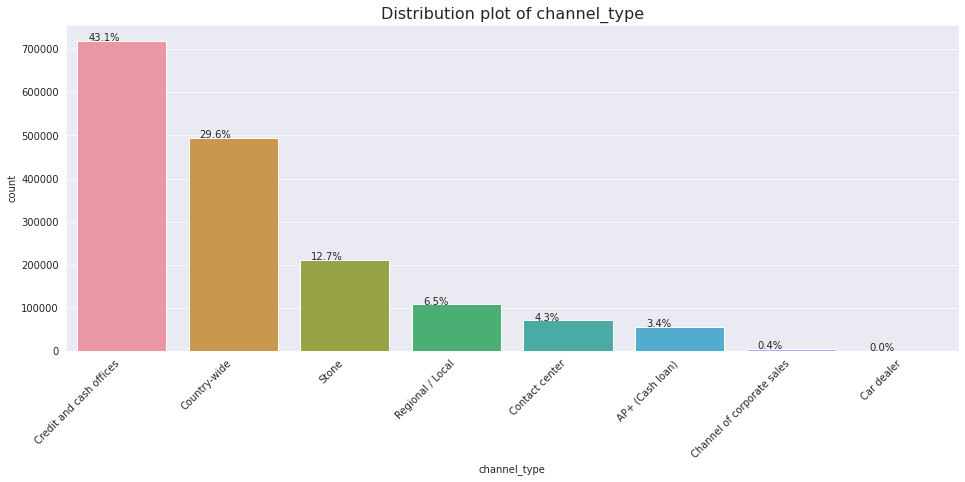

In [149]:
#Through what channel was the client acquired
plt.figure(figsize = [16,6])
cat_plotp('channel_type')



> Most of the clients were acquired through credit and cash office and country-wide channels.



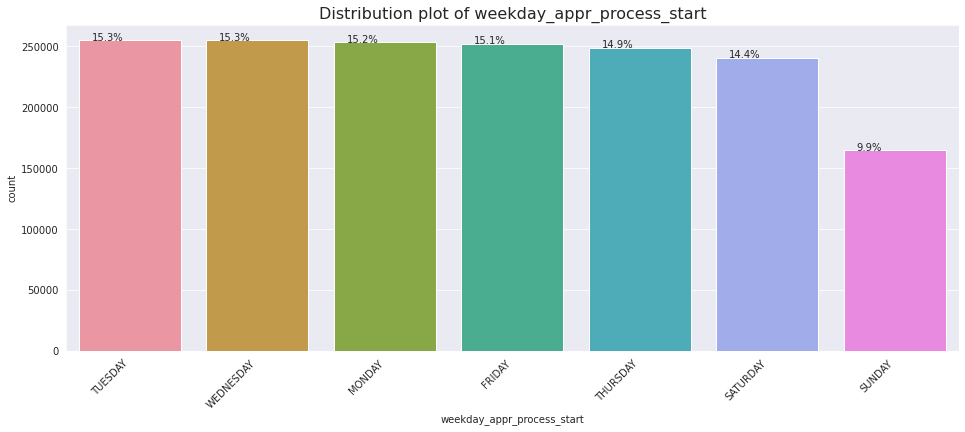

In [150]:
#On which day of the week did the client apply for previous application
plt.figure(figsize = [16,6])
cat_plotp('weekday_appr_process_start')



> Looks like application were consistent throughout the week except for sunday.



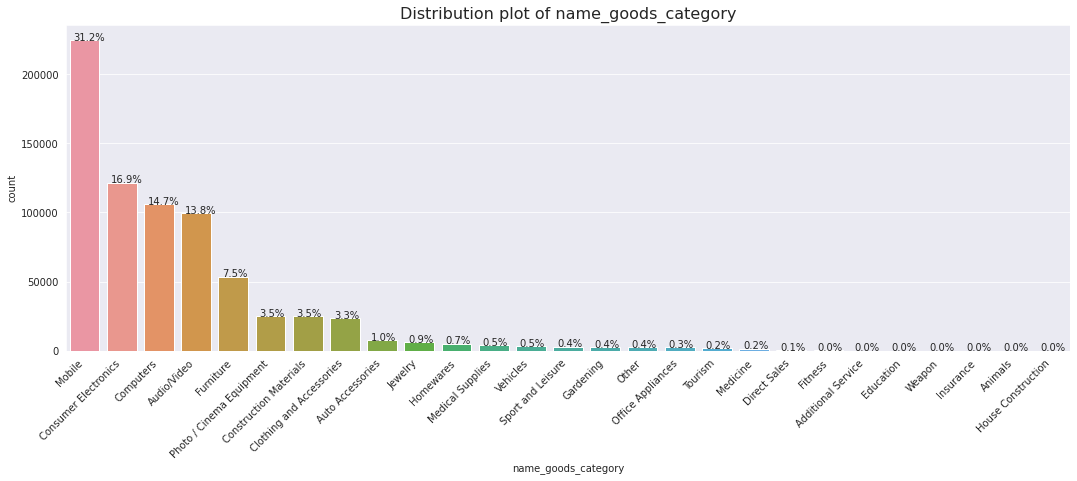

In [151]:
#kind of goods did the client apply for in the previous application
plt.figure(figsize = [18,6])
cat_plotp('name_goods_category')



>Most of the previous loan application were for mobiles, electronics, computers and A/V.



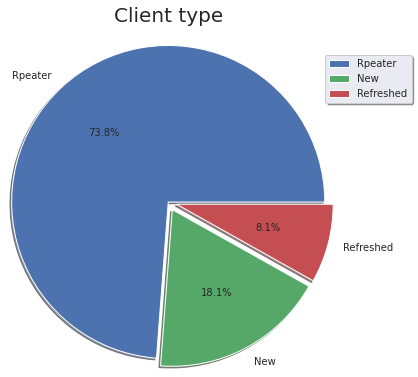

In [152]:
#Type of client: whether he/she was new or old client
with plt.style.context('seaborn-deep'):
    explode = (0, 0.1, 0.1)
    plt.pie(data1.name_client_type.value_counts(), labels = ['Rpeater', 'New', 'Refreshed'], explode = explode, radius = 1.8, autopct='%0.1f%%', shadow = True)
    plt.title('Client type', fontsize = 20, y = 1.3)
    plt.legend(bbox_to_anchor=(1.2, 1.2), fancybox=True, shadow=True)
    plt.show()



> Around 74% of the aplicants were repeaters, 16% New and 8% refreshed.



Analysing catagorical variables with respect to other catagorical variables.

In [153]:
#Fuction for visualizing two catagorical variables at the same time
#Function for visualizing composition of categories of different qualitative variables
def hue_cat_plotp(x, y):
    with plt.style.context('seaborn-muted'):
        cnt1 = sns.countplot(data1[x], order = data1[x].value_counts().index, hue = data1[y])
        #plt.xticks(rotation = 45, ha = 'right')
        cnt1.set_title('Distribution plot of {}'.format(x), fontsize = 16)
        for k in cnt1.patches:
            cnt1.annotate('{:.1f}%'.format(k.get_height()/data1[x].notnull().sum()*100),(k.get_x()+0.05, k.get_height()))
    plt.show()

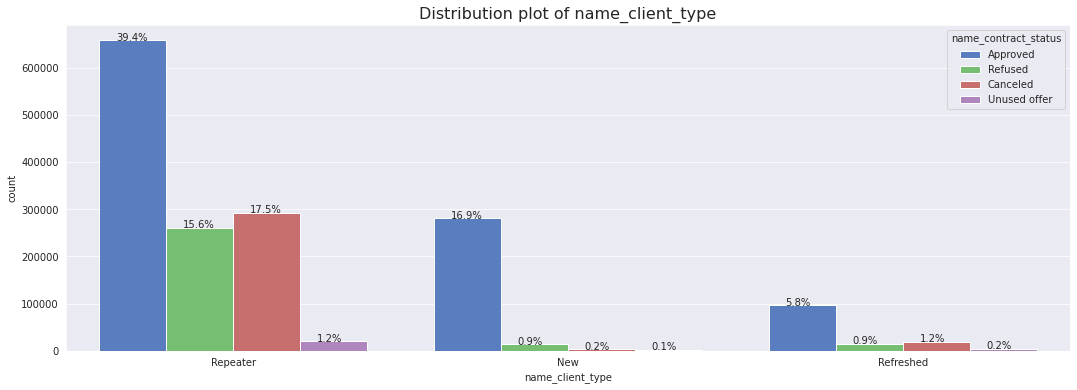

In [154]:
plt.figure(figsize = [18,6])
hue_cat_plotp('name_client_type', 'name_contract_status')




> There is high percentage, 39.4% of clients who are repeaters and whose application were approved.


> Repeaters' application is more rejected and cancelled when compared to the percentage approved than any other client types. 



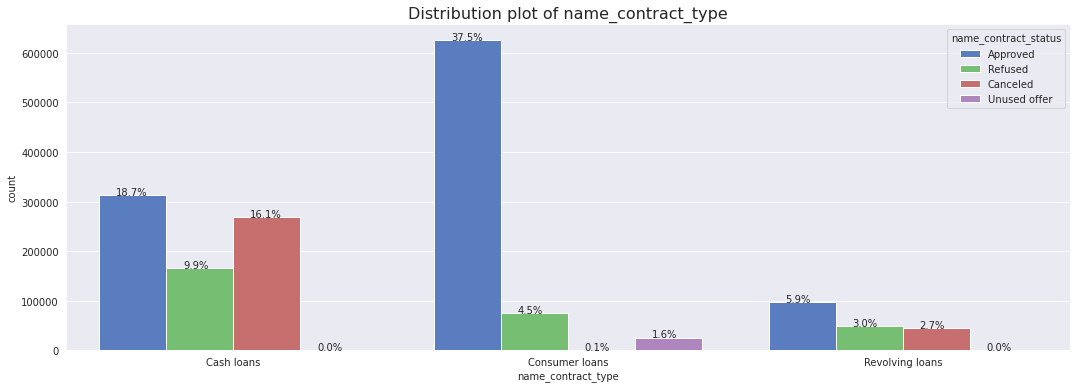

In [155]:
plt.figure(figsize = [18,6])
hue_cat_plotp('name_contract_type', 'name_contract_status')



> Eventhough most of the loan types are cash loans as we have already seen in univariate analysis, consumer loans have a higher likelihood of getting approved.





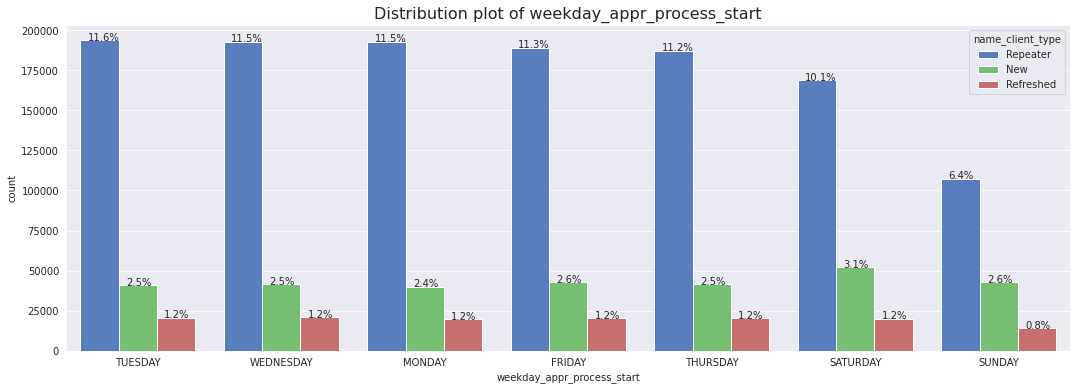

In [156]:
plt.figure(figsize = [18,6])
hue_cat_plotp('weekday_appr_process_start', 'name_client_type')



> Composition of type of clients looks more or less the same throughout the week except on sunday.



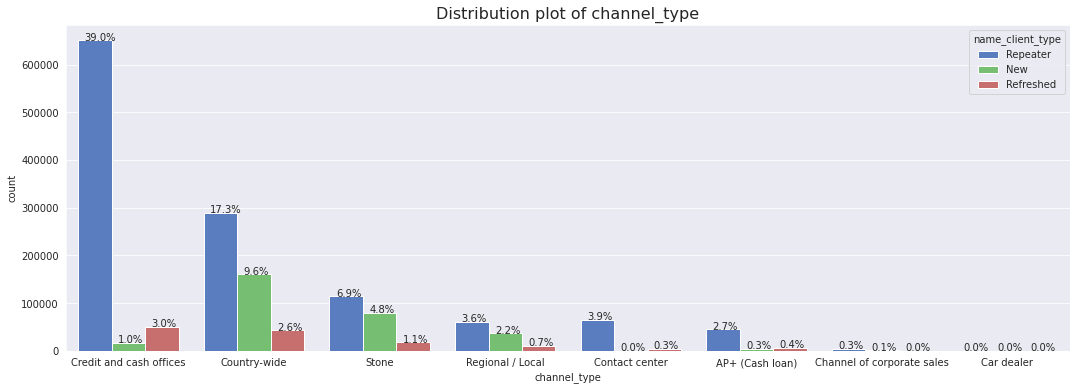

In [157]:
plt.figure(figsize = [18,6])
hue_cat_plotp('channel_type', 'name_client_type')



> Most of the new clients were acquired through Country-wide channel. On the other hand, old clients were mostly acquired through Credit and cash offices channel.



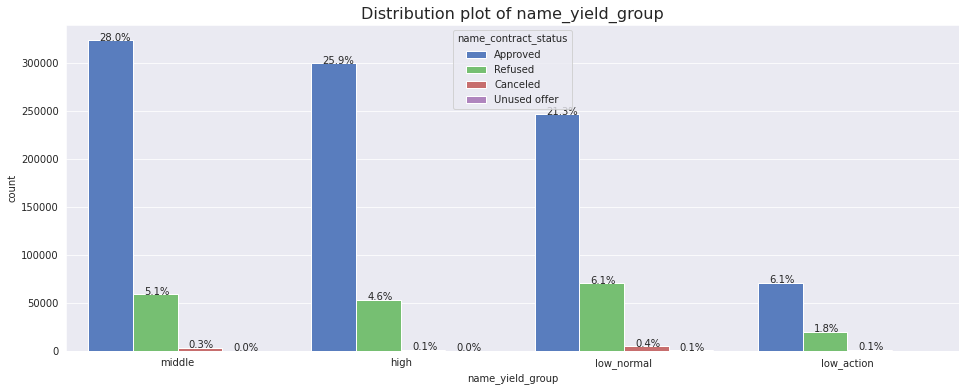

In [158]:
#Intrest rate group of clients
plt.figure(figsize = [16,6])
hue_cat_plotp('name_yield_group', 'name_contract_status')



> From the data, the application with low_normal intrest rates were refused more than the other intrest rate groups.



In [159]:
data1.shape, data0.shape

((1670214, 37), (307508, 77))

#### Quantitative varible analysis

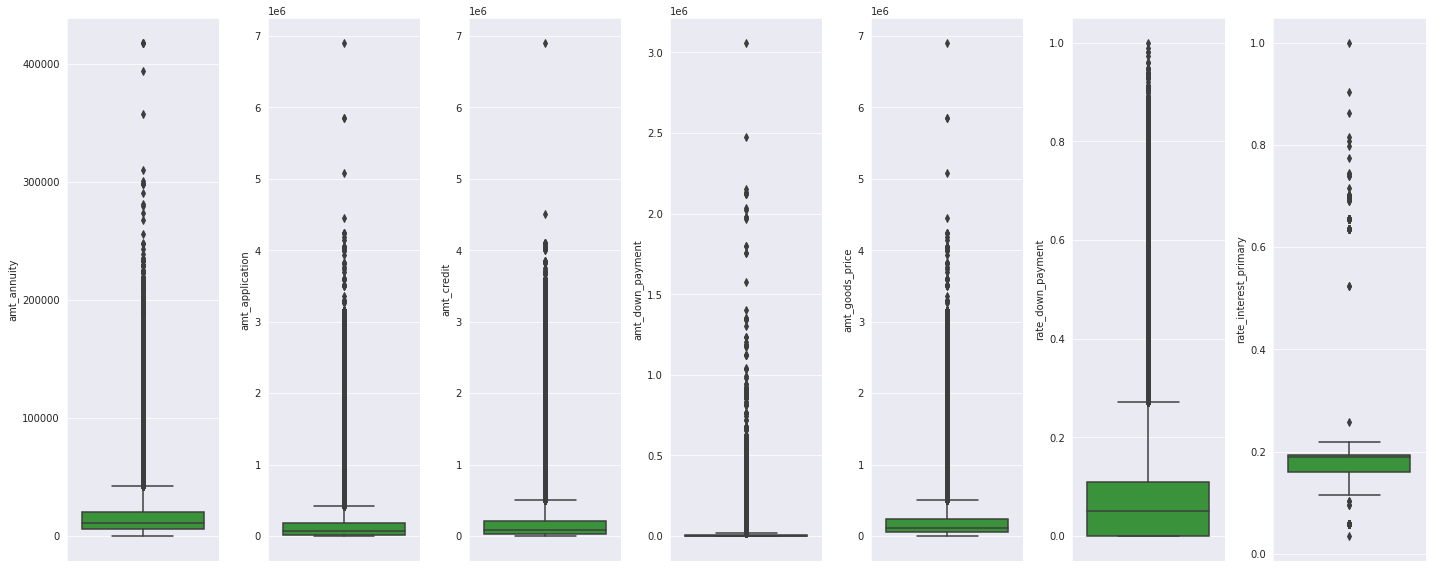

In [160]:
#Visualizing distribution of some important numerical variables
plt.figure(figsize = [20,8])
plt.subplot(1,7,1)
sns.boxplot(y = data1.amt_annuity, color = 'tab:green')
plt.subplot(1,7,2)
sns.boxplot(y = data1.amt_application, color = 'tab:green')
plt.subplot(1,7,3)
sns.boxplot(y = data1.amt_credit, color = 'tab:green')
plt.subplot(1,7,4)
sns.boxplot(y = data1.amt_down_payment, color = 'tab:green')
plt.subplot(1,7,5)
sns.boxplot(y = data1.amt_goods_price, color = 'tab:green')
plt.subplot(1,7,6)
sns.boxplot(y = data1.rate_down_payment, color = 'tab:green')
plt.subplot(1,7,7)
sns.boxplot(y = data1.rate_interest_primary, color = 'tab:green')
plt.tight_layout()
plt.show()



>As evident, all of these variables have a tail of outliers.



In [161]:
data1.name_contract_status.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: name_contract_status, dtype: int64

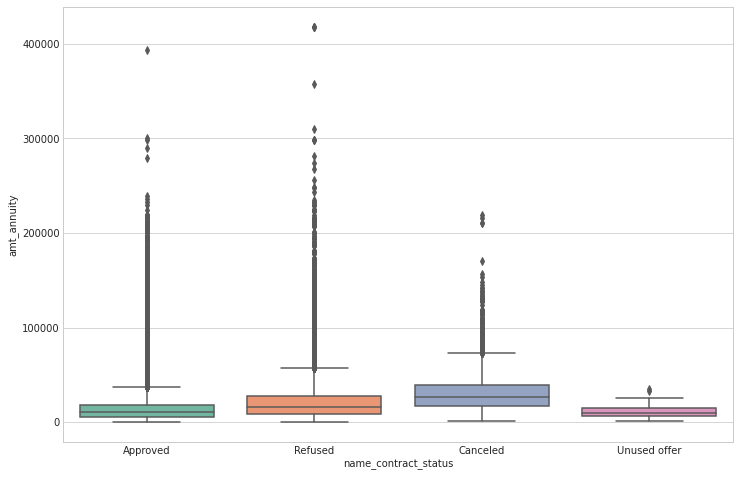

In [162]:
#name_contract_status vs amt_annuity
plt.figure(figsize = [12,8])
with plt.style.context('seaborn-whitegrid'):
    sns.boxplot(data1.name_contract_status, data1.amt_annuity, palette = 'Set2')
plt.show()



> Annuity amount was lower for loan application that were approved. Most of the cancelled and refused applications had higher annuity amount.



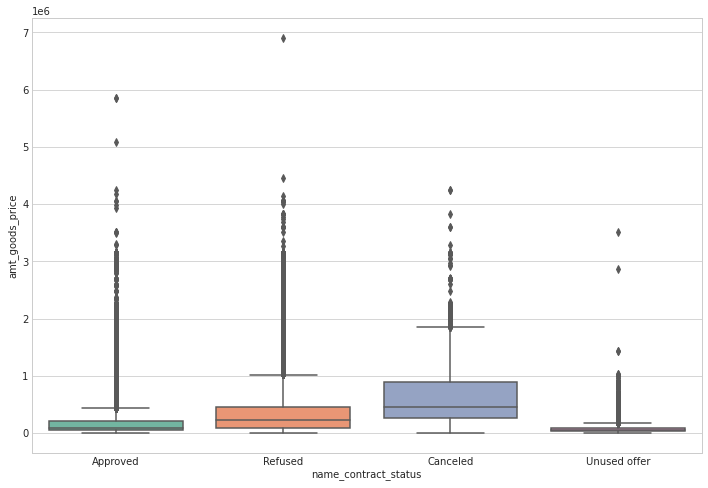

In [163]:
#name_contract_status vs amt_goods_price
plt.figure(figsize = [12,8])
with plt.style.context('seaborn-whitegrid'):
    sns.boxplot(data1.name_contract_status, data1.amt_goods_price, palette = 'Set2')
plt.show()



> We can observe here, goods price of goods that client asked for is realtively higher for the applications that got canceled and refused. Most lower amt_goods_price were approved possibly because these applications look less risky.



#### Merging dataframes and bivariate and multivariate analysis

In [164]:
#We will merge only 'sk_id_curr' and 'target' of aplication dataset with previous application data
##Extracting 'kn_id_curr', 'target','code_gender from application dataset.(more attributes can be extracted for more analysis.)
df_id = data0[['sk_id_curr', 'target','code_gender']]
df_id

,sk_id_curr,target,code_gender
0,100002,1,M
1,100003,0,F
2,100004,0,M
3,100006,0,F
4,100007,0,M
...,...,...,...
307506,456251,0,M
307507,456252,0,F
307508,456253,0,F
307509,456254,1,F


In [165]:
#merginging datasets
new_data = pd.merge(df_id, data1, on = 'sk_id_curr', how = 'inner')

In [166]:
#shape of merged dataset
new_data.shape

(1413701, 39)

In [167]:
new_data.head()

,sk_id_curr,target,code_gender,sk_id_prev,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,...,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,100002,1,M,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,F,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,...,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,F,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,F,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,M,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [168]:
#Fuction for visualizing two catagorical variables at the same time in merged dataset
#Function for visualizing composition of categories of different qualitative variables
def hue_cat_plotp2(x, y, t):
    with plt.style.context('seaborn-muted'):
        cnt1 = sns.countplot(new_data.loc[new_data.target == t, x], order = new_data.loc[new_data.target == t, x].value_counts().index, hue = new_data[y])
        #plt.xticks(rotation = 45, ha = 'right')
        cnt1.set_title('Distribution plot of {}'.format(x), fontsize = 16)
        for k in cnt1.patches:
            cnt1.annotate('{:.1f}%'.format(k.get_height()/new_data.loc[new_data.target == t, x].notnull().sum()*100),(k.get_x()+0.05, k.get_height()))
    plt.show()

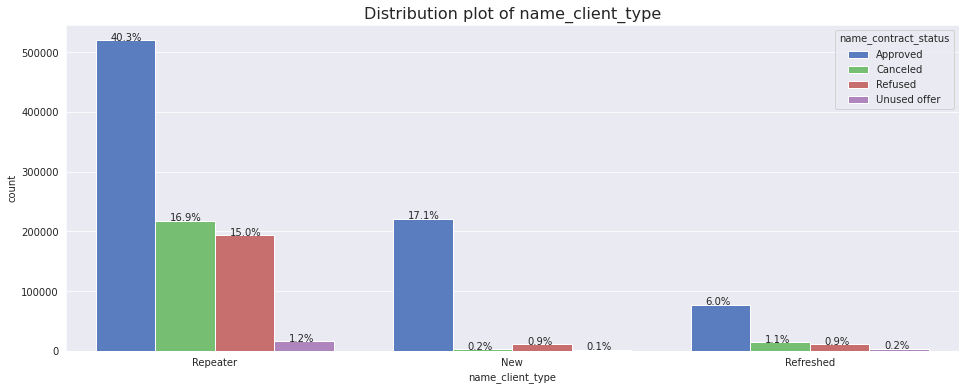

In [169]:
#Non-defaulters
plt.figure(figsize = [16,6])
hue_cat_plotp2('name_client_type', 'name_contract_status', 0)

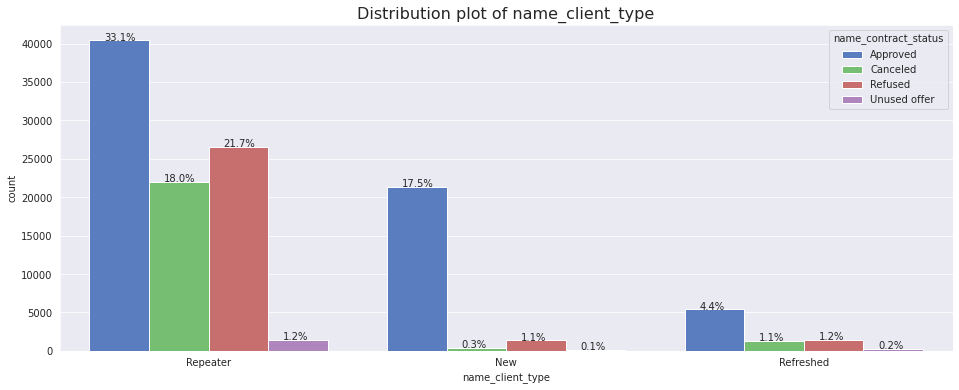

In [170]:
#Defaulters
plt.figure(figsize = [16,6])
hue_cat_plotp2('name_client_type', 'name_contract_status', 1)



> We can see a clear difference here of status of previous loan for different client types. It looks like repeaters who are defaulters/have payment difficulties are refused and cancelled more than that for non-defaulters. So, clearly, bank pays attention to this kind of information.

> Also, people with payment difficulties tend to apply for loans in several bank and pick best one. Therefore, the percentage of cancelled application is also more for defaulters.





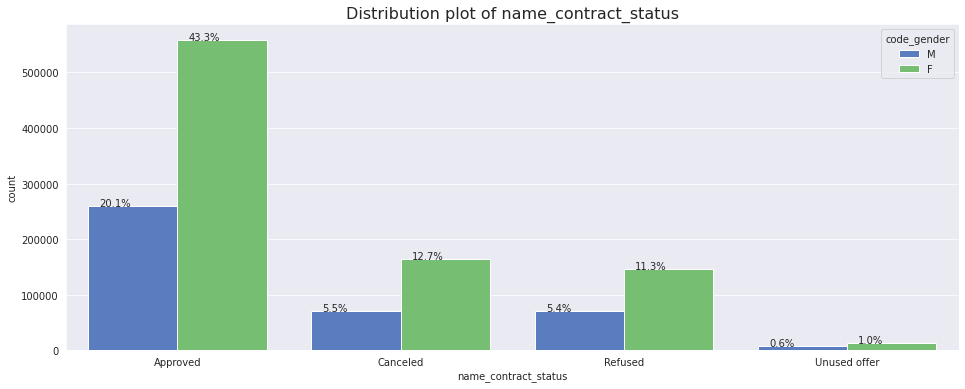

In [171]:
#Gender and name_contract_status
##Non-defaulters
plt.figure(figsize = [16,6])
hue_cat_plotp2('name_contract_status', 'code_gender', 0)

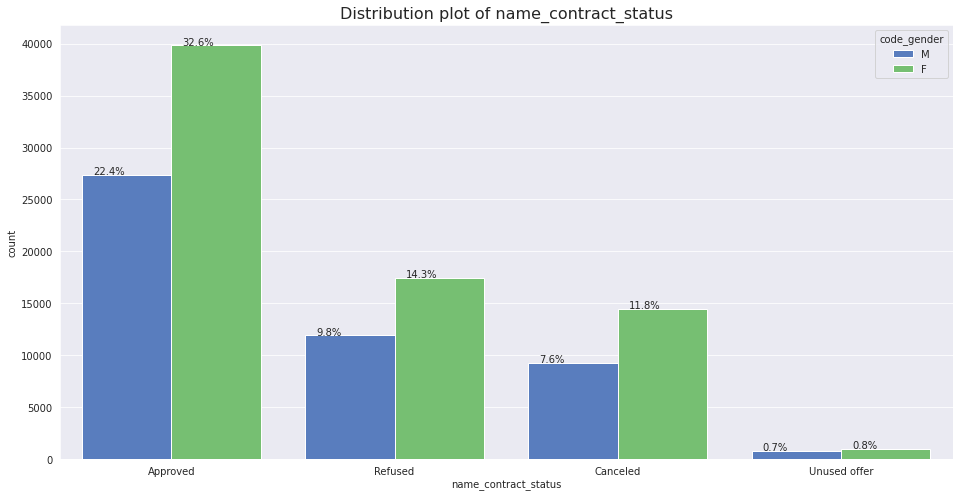

In [172]:
##Defaulters
plt.figure(figsize = [16,8])
hue_cat_plotp2('name_contract_status', 'code_gender', 1)




> The overall percentage of previous application that were refused or canceled is more is clearly more for defaulters/people with payment difficulties when compared to the non-defaulter group.


> Percentage of men who applied for loans previously and canceled/refused it is relatively higher in defaulter group.






#### Correlation and more multivariate analysis

In [173]:
new_data.select_dtypes(include = ['int64','float64']).columns

Index(['sk_id_curr', 'target', 'sk_id_prev', 'amt_annuity', 'amt_application',
       'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'hour_appr_process_start', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'days_decision', 'sellerplace_area',
       'cnt_payment', 'days_first_drawing', 'days_first_due',
       'days_last_due_1st_version', 'days_last_due', 'days_termination',
       'nflag_insured_on_approval'],
      dtype='object')

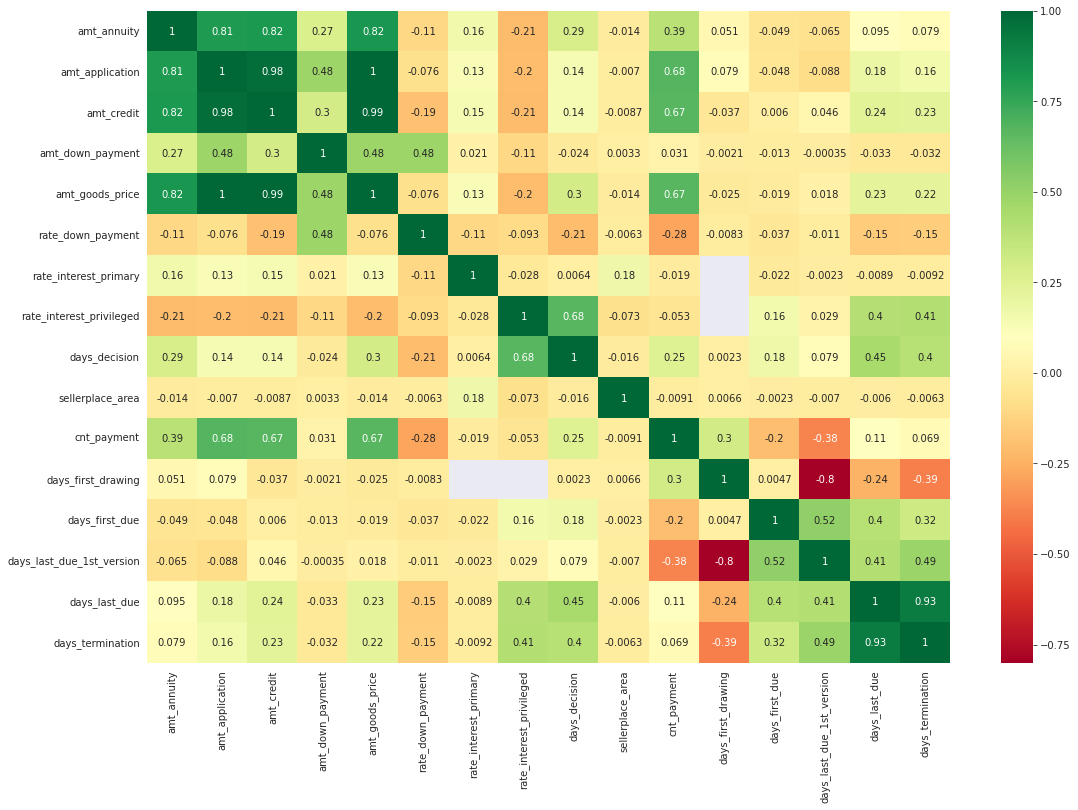

In [174]:
#Heatmap of all the relevant numeric columns for both the groups in new_data
##Non-defaulters
cols = ['amt_annuity', 'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price', 'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'days_decision', 'sellerplace_area', 'cnt_payment', 'days_first_drawing', 'days_first_due',
       'days_last_due_1st_version', 'days_last_due', 'days_termination']
plt.figure(figsize = [18,12])
sns.heatmap(new_data.loc[new_data.target == 0, cols].corr(), cmap = 'RdYlGn', annot = True)
plt.show() 

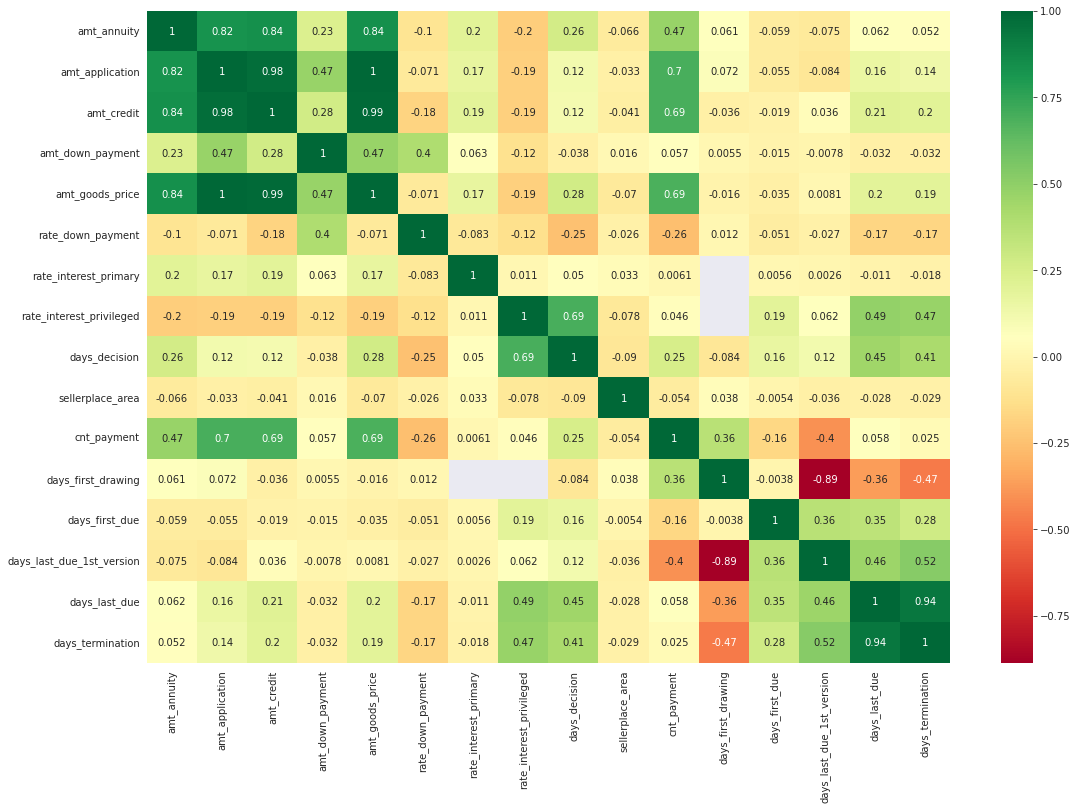

In [175]:
#Defaulters
plt.figure(figsize = [18,12])
sns.heatmap(new_data.loc[new_data.target == 1, cols].corr(), cmap = 'RdYlGn', annot = True)
plt.show() 

Top 10 correlations in previous application dataset

In [176]:
#Top correlations in previous application dataset
##Non-defaulters
corr = new_data.loc[new_data.target == 0, cols].corr()
corr_matrix0 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_matrix0.columns = ['variable_1', 'variable_2', 'correlation_coeff']
corr_matrix0.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
corr_matrix0['abs_correlation_coeff'] = corr_matrix0['correlation_coeff'].abs()
corr_matrix0.sort_values('abs_correlation_coeff', ascending = False, inplace = True)

In [177]:
corr_matrix0.head(10)

,variable_1,variable_2,correlation_coeff,abs_correlation_coeff
65,amt_goods_price,amt_application,0.999888,0.999888
66,amt_goods_price,amt_credit,0.993299,0.993299
33,amt_credit,amt_application,0.975725,0.975725
254,days_termination,days_last_due,0.926830,0.926830
64,amt_goods_price,amt_annuity,0.821027,0.821027
32,amt_credit,amt_annuity,0.816541,0.816541
16,amt_application,amt_annuity,0.809023,0.809023
219,days_last_due_1st_version,days_first_drawing,-0.801063,0.801063
161,cnt_payment,amt_application,0.682531,0.682531
135,days_decision,rate_interest_privileged,0.675931,0.675931


In [178]:
##Defaulters
corr = new_data.loc[new_data.target == 1, cols].corr()
corr_matrix1 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_matrix1.columns = ['variable_1', 'variable_2', 'correlation_coeff']
corr_matrix1.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
corr_matrix1['abs_correlation_coeff'] = corr_matrix1['correlation_coeff'].abs()
corr_matrix1.sort_values('abs_correlation_coeff', ascending = False, inplace = True)

In [179]:
corr_matrix1.head(10)

,variable_1,variable_2,correlation_coeff,abs_correlation_coeff
65,amt_goods_price,amt_application,0.999676,0.999676
66,amt_goods_price,amt_credit,0.992302,0.992302
33,amt_credit,amt_application,0.975377,0.975377
254,days_termination,days_last_due,0.937718,0.937718
219,days_last_due_1st_version,days_first_drawing,-0.886465,0.886465
32,amt_credit,amt_annuity,0.840461,0.840461
64,amt_goods_price,amt_annuity,0.840196,0.840196
16,amt_application,amt_annuity,0.824962,0.824962
161,cnt_payment,amt_application,0.696151,0.696151
135,days_decision,rate_interest_privileged,0.693743,0.693743


In [180]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [181]:
#Merging all the attributes of current application data and previous application data on sk_id_curr
merged_data = pd.merge(data0, data1, on = 'sk_id_curr', how = 'inner')
merged_data.head()

,sk_id_curr,target,name_contract_type_x,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,name_type_suite_x,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start_x,hour_appr_process_start_x,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,years_birth,years_employed,age_group,income_group,sk_id_prev,name_contract_type_y,amt_annuity_y,amt_application,amt_credit_y,amt_down_payment,amt_goods_price_y,weekday_appr_process_start_y,hour_appr_process_start_y,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite_y,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0,<25,high-medium,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,-606,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0,40-45,high,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,-746,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0,40-45,high,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,-828,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5

In [182]:
#Number of previous applications corresponding to current application id
df_cp = new_data.groupby('sk_id_curr').target.agg([sum, 'count'])
df_cp.head(8)

,sum,count
sk_id_curr,,
100002,1,1
100003,0,3
100004,0,1
100006,0,9
100007,0,6
100008,0,5
100009,0,7
100010,0,1


In [183]:
df_cp.sort_values('count', ascending = False).head(8)

,sum,count
sk_id_curr,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
389950,0,64
382179,0,64
198355,0,63
345161,0,62


In [184]:
#previous applications by Non-defaulters
df_cp[df_cp['sum'] == 0].sort_values('count', ascending = False).head(8)

,sum,count
sk_id_curr,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
382179,0,64
389950,0,64
198355,0,63
446486,0,62


In [185]:
#previous applications by Defaulters
df_cp[df_cp['sum'] > 0].sort_values('count', ascending = False).head(8)

,sum,count
sk_id_curr,,
133023,60,60
235163,58,58
110899,58,58
303706,54,54
139875,50,50
264093,50,50
108707,46,46
345886,46,46


In [186]:
#missing values
x = round(merged_data.isnull().sum()/merged_data.shape[0]*100, 2)
x[x > 0]

occupation_type              22.28
organization_type            19.35
years_employed               19.35
name_contract_type_y          0.02
amt_annuity_y                21.73
amt_down_payment             53.02
amt_goods_price_y            22.60
rate_down_payment            53.02
rate_interest_primary        99.66
rate_interest_privileged     99.66
name_cash_loan_purpose       95.80
name_payment_type            36.99
code_reject_reason           81.34
name_type_suite_y            49.14
name_client_type              0.11
name_goods_category          56.39
name_portfolio               21.73
name_product_type            63.67
name_seller_industry         50.60
cnt_payment                  21.73
name_yield_group             30.36
product_combination           0.02
days_first_drawing           39.69
days_first_due               39.69
days_last_due_1st_version    39.69
days_last_due                39.69
days_termination             39.69
nflag_insured_on_approval    39.69
dtype: float64

In [187]:
cols = [col for col in merged_data.columns if merged_data[col].isna().sum()/merged_data.shape[0] > 0.4]
merged_data.drop(cols, axis = 1, inplace = True)
merged_data.drop(['years_employed','years_birth'], axis = 1, inplace = True)

In [188]:
x = round(merged_data.isnull().sum()/merged_data.shape[0]*100, 2)
x[x > 0]

occupation_type              22.28
organization_type            19.35
name_contract_type_y          0.02
amt_annuity_y                21.73
amt_goods_price_y            22.60
name_payment_type            36.99
name_client_type              0.11
name_portfolio               21.73
cnt_payment                  21.73
name_yield_group             30.36
product_combination           0.02
days_first_drawing           39.69
days_first_due               39.69
days_last_due_1st_version    39.69
days_last_due                39.69
days_termination             39.69
nflag_insured_on_approval    39.69
dtype: float64

In [189]:
cols = ['occupation_type','organization_type','name_contract_type_y','name_payment_type', 'name_client_type', 
        'name_portfolio','name_yield_group', 'product_combination','nflag_insured_on_approval']
for i in cols:
    merged_data[i] = merged_data[i].fillna(merged_data[i].mode()[0])

In [190]:
cols = ['amt_annuity_y', 'amt_goods_price_y','amt_goods_price_y']
for i in cols:
    merged_data[i] = merged_data[i].fillna(merged_data[i].mean())

In [191]:
cols = ['cnt_payment', 'days_first_drawing', 'days_first_due', 'days_last_due_1st_version', 'days_last_due', 
        'days_termination',]
for i in cols:
    merged_data[i] = merged_data[i].fillna(merged_data[i].median())

In [192]:
#other remaining records with missing values are insignificant in number, we can drop them
merged_data.dropna(axis = 0, inplace = True)

In [193]:
#any missing values now?
merged_data.isna().any()

sk_id_curr                      False
target                          False
name_contract_type_x            False
code_gender                     False
flag_own_car                    False
flag_own_realty                 False
cnt_children                    False
amt_income_total                False
amt_credit_x                    False
amt_annuity_x                   False
amt_goods_price_x               False
name_type_suite_x               False
name_income_type                False
name_education_type             False
name_family_status              False
name_housing_type               False
region_population_relative      False
days_birth                      False
days_employed                   False
days_registration               False
days_id_publish                 False
flag_mobil                      False
flag_emp_phone                  False
flag_work_phone                 False
flag_cont_mobile                False
flag_phone                      False
flag_email  

## 4. Data Modeling

In [194]:
#dropping sk_id_curr and sk_id_prev as they are useless for model
merged_data.drop(['sk_id_curr', 'sk_id_prev'], axis = 1, inplace = True)

In [195]:
merged_data.head()

,target,name_contract_type_x,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,name_type_suite_x,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start_x,hour_appr_process_start_x,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age_group,income_group,name_contract_type_y,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,weekday_appr_process_start_y,hour_appr_process_start_y,flag_last_appl_per_contract,nflag_last_appl_in_day,name_contract_status,days_decision,name_payment_type,name_client_type,name_portfolio,channel_type,sellerplace_area,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,<25,high-medium,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,Approved,-606,Cash through the bank,New,POS,Stone,500,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,Approved,-746,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,Approved,-828,Cash through the bank,Refreshed,POS,Stone,1400,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-45,high,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,Approved,-2341,Cash through the bank,Refreshed,POS,Country-wide,200,12.0,middle,POS household with interest,3

### Preprocessing

In [196]:
#columns to be changed to category type
cols = ['flag_own_car','flag_own_realty','flag_mobil',
 'flag_emp_phone','flag_work_phone','flag_cont_mobile',
 'flag_phone','flag_email','region_rating_client',
 'region_rating_client_w_city','reg_region_not_live_region',
 'reg_region_not_work_region','live_region_not_work_region',
 'reg_city_not_live_city','reg_city_not_work_city','flag_document_2',
 'flag_document_3','flag_document_4','flag_document_5','flag_document_6',
 'flag_document_7','flag_document_8','flag_document_9',
 'flag_document_10','flag_document_11','flag_document_12','flag_document_13',
 'flag_document_14','flag_document_15','flag_document_16','flag_document_17',
 'flag_document_18','flag_document_19','flag_document_20','flag_document_21',
 'nflag_insured_on_approval']
merged_data[cols] = merged_data[cols].astype('category')

In [197]:
cat_cols = [col for col in merged_data.select_dtypes(include = ['object', 'category']).columns]
num_cols = [col for col in merged_data.select_dtypes(include = np.number).columns if col != 'target']

In [198]:
cat_cols

['name_contract_type_x',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_type_suite_x',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'occupation_type',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start_x',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'organization_type',
 'flag_document_2',
 'flag_document_3',
 'flag_document_4',
 'flag_document_5',
 'flag_document_6',
 'flag_document_7',
 'flag_document_8',
 'flag_document_9',
 'flag_document_10',
 'flag_document_11',
 'flag_document_12',
 'flag_document_13',
 'flag_document_14',
 'flag_document_15',
 'flag_document_16',
 'flag_document_17',
 'flag_document_18',
 'flag_document_19',
 'flag_document_20',
 'flag_document_21',
 'age_group',

In [199]:
num_cols

['cnt_children',
 'amt_income_total',
 'amt_credit_x',
 'amt_annuity_x',
 'amt_goods_price_x',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'cnt_fam_members',
 'hour_appr_process_start_x',
 'live_city_not_work_city',
 'ext_source_2',
 'ext_source_3',
 'obs_30_cnt_social_circle',
 'def_30_cnt_social_circle',
 'obs_60_cnt_social_circle',
 'def_60_cnt_social_circle',
 'days_last_phone_change',
 'amt_req_credit_bureau_hour',
 'amt_req_credit_bureau_day',
 'amt_req_credit_bureau_week',
 'amt_req_credit_bureau_mon',
 'amt_req_credit_bureau_qrt',
 'amt_req_credit_bureau_year',
 'amt_annuity_y',
 'amt_application',
 'amt_credit_y',
 'amt_goods_price_y',
 'hour_appr_process_start_y',
 'nflag_last_appl_in_day',
 'days_decision',
 'sellerplace_area',
 'cnt_payment',
 'days_first_drawing',
 'days_first_due',
 'days_last_due_1st_version',
 'days_last_due',
 'days_termination']

In [200]:
#creating dummy variables for catagorical features
dummy_df = pd.get_dummies(merged_data[cat_cols], drop_first = True)
dummy_df.head()

,name_contract_type_x_Revolving loans,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organization_type_Services,organization_type_Telecom,organization_type_Trade: type 1,organization_type_Trade: type 2,organization_type_Trade: type 3,organization_type_Trade: type 4,organization_type_Trade: type 5,organization_type_Trade: type 6,organization_type_Trade: type 7,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,flag_document_2_1,flag_document_3_1,flag_document_4_1,flag_document_5_1,flag_document_6_1,flag_document_7_1,flag_document_8_1,flag_document_9_1,flag_document_10_1,flag_document_11_1,flag_document_12_1,flag_document_13_1,flag_document_14_1,flag_document_15_1,flag_document_16_1,flag_document_17_1,fla

In [201]:
#concatenating the dummies with merged_data and overwriting merged_data
merged_data = pd.concat([merged_data, dummy_df], axis = 1)

In [202]:
#dropping old catagorical columns as dummies have been created for them
merged_data.drop(cat_cols, axis = 1, inplace = True)

In [203]:
merged_data.head()

,target,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,name_contract_type_x_Revolving loans,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Minist

In [204]:
merged_data.shape

(1413700, 244)

In [205]:
md_0 = merged_data.loc[merged_data['target'] == 0, :]
md_1 = merged_data.loc[merged_data['target'] == 1, :]
md_0_under = md_0.sample(md_1.shape[0])
# concat md_0_under , md_1
mergedData = pd.concat([md_0_under, md_1], axis = 0)
mergedData = mergedData.sample(10000)


In [206]:
X_balanced = mergedData.drop('target', axis = 1)
y_balanced = mergedData['target']

In [207]:
y_balanced.value_counts()

0    5019
1    4981
Name: target, dtype: int64

##### Train-Test Split

In [208]:
#splitting into train and test data
train_X, test_X, train_y, test_y = train_test_split(X_balanced, y_balanced, test_size=0.3,random_state=1, stratify=y_balanced)

In [209]:
train_X.head()

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,name_contract_type_x_Revolving loans,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,or

In [210]:
test_X.head()

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,name_contract_type_x_Revolving loans,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,or

In [211]:
test_y.value_counts()

0    1506
1    1494
Name: target, dtype: int64

In [212]:
train_X.shape, test_X.shape

((7000, 243), (3000, 243))

### Feature Scaling

In [213]:
#using standard scaler to standardise the numerical features
scaler = StandardScaler()
train_X[num_cols] = scaler.fit_transform(train_X[num_cols])
test_X[num_cols] = scaler.transform(test_X[num_cols])

In [214]:
train_X.head()

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,name_contract_type_x_Revolving loans,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,or

In [215]:
test_X.head()

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,name_contract_type_x_Revolving loans,code_gender_M,flag_own_car_Y,flag_own_realty_Y,name_type_suite_x_Family,name_type_suite_x_Group of people,name_type_suite_x_Other_A,name_type_suite_x_Other_B,"name_type_suite_x_Spouse, partner",name_type_suite_x_Unaccompanied,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,flag_emp_phone_1,flag_work_phone_1,flag_cont_mobile_1,flag_phone_1,flag_email_1,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,region_rating_client_2,region_rating_client_3,region_rating_client_w_city_2,region_rating_client_w_city_3,weekday_appr_process_start_x_MONDAY,weekday_appr_process_start_x_SATURDAY,weekday_appr_process_start_x_SUNDAY,weekday_appr_process_start_x_THURSDAY,weekday_appr_process_start_x_TUESDAY,weekday_appr_process_start_x_WEDNESDAY,reg_region_not_live_region_1,reg_region_not_work_region_1,live_region_not_work_region_1,reg_city_not_live_city_1,reg_city_not_work_city_1,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,or

In [216]:
#mean and std of numrical columns after standard scaling
train_X[num_cols].agg([np.mean, np.std]).round(2)

,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,cnt_fam_members,hour_appr_process_start_x,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,hour_appr_process_start_y,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [217]:
#conversion rate or defaulting rate in data
rate = train_y.mean()*100
print('Conversion rate in training data : {}%'.format(round(rate,2)))

Conversion rate in training data : 49.81%


### Model Building

#### RFE and VIF for various Classifiers

RandomForrestClassifier is an ensemble learning algorithm. It uses many trees, and it makes a prediction is based on the mode of the predictions of each component tree (majority voting). It generally has much better predictive accuracy than a single decision tree.

#####**Feature Selection with RFE**

Recursive Feature Elimination

In [218]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [219]:
def get_selector(model):
  selector = RFE(estimator = model, n_features_to_select = 100)
  return selector

#list of models 
model=[RandomForestClassifier(random_state = 1),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=7),AdaBoostClassifier(n_estimators=100, random_state=7),SVC(kernel= "linear")]

#intializing count cnt to assign values to variables while iteration 
cnt = 0
train_X_rf = pd.DataFrame()
train_X_xg = pd.DataFrame()
train_X_adb = pd.DataFrame()
train_X_svc = pd.DataFrame()
test_X_rf = pd.DataFrame()
test_X_xg = pd.DataFrame()
test_X_adb = pd.DataFrame()
test_X_svc = pd.DataFrame()

#list of train_X for various models
train_X_list = [train_X_rf,train_X_xg,train_X_adb,train_X_svc]
#train_X_list_cp = [train_X_rf_cp,train_X_xg_cp,train_X_adb_cp,train_X_svc_cp]
#list of test_X for various models
test_X_list = [test_X_rf,test_X_xg,test_X_adb,test_X_svc]

#features list
features_list = ['features_rf','features_xg','features_adb','features_svc']
vif_list = ['vif_rf', 'vif_xg', 'vif_adb', 'vif_svc']

for i in model:
  
  selector = get_selector(i) 
  print("selector_done")
  selector.fit(train_X, train_y)
  print("model_done")
  cols = train_X.columns[selector.support_]
  print("cols_done")
  train_X_list[cnt] = train_X[cols]
  #train_X_list_cp[cnt] = train_X_list[cnt].copy(deep=True)

  print("train_done")
  test_X_list[cnt] = test_X[cols]
  #test_X_list_cp[cnt] = test_X_list[cnt].copy(deep=True)
  print("test_done")

  #Create a dataframe that will contain the names of all the feature variables and their respective VIFs 
  vif = pd.DataFrame()

  vif[features_list[cnt]] = train_X_list[cnt].columns
  vif[vif_list[cnt]] = [variance_inflation_factor(train_X_list[cnt].values, i) for i in range(train_X_list[cnt].shape[1])]
  vif[vif_list[cnt]] = round(vif[vif_list[cnt]], 2)
  vif = vif.sort_values(by = vif_list[cnt] , ascending = False)
    
  #removing features with vif greater than 5
  features_to_remove = vif.loc[vif[vif_list[cnt]] > 5, features_list[cnt]]
  features_to_remove = list(features_to_remove)
    
  train_X_list[cnt].drop(features_to_remove, axis = 1, inplace = True)
  test_X_list[cnt].drop(features_to_remove, axis = 1, inplace = True)

  cnt+=1
  
  

selector_done
model_done
cols_done
train_done
test_done
selector_done
model_done
cols_done
train_done
test_done
selector_done
model_done
cols_done
train_done
test_done
selector_done
model_done
cols_done
train_done
test_done


In [220]:
train_X_list[0].shape

(7000, 71)

In [224]:
import os 
os.getcwd()

'/content'

In [228]:
import pickle 
with open(r'test_data.h5','wb') as f:
  pickle.dump(test_X_list[0], f)
from google.colab import files
files.download("/content/test_data.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [229]:
with open(r'target.h5','wb') as f:
  pickle.dump(test_y,f)
from google.colab import files
files.download("/content/target.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Random forest classifier


In [230]:
#Building mdoel with final selection of features
model_rf = RandomForestClassifier(random_state = 1)

In [231]:
model_rf.fit(train_X_list[0], train_y)

RandomForestClassifier(random_state=1)

In [237]:
with open(r'random_forest_model.h5','wb') as f:
  pickle.dump(model_rf,f)
from google.colab import files
files.download("/content/random_forest_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [238]:
y_pred_rf = model_rf.predict(test_X_list[0])

In [240]:
score = accuracy_score(test_y, y_pred_rf)
print('Accuracy score on Test data : {}'.format(score))

Accuracy score on Test data : 0.6806666666666666


####**XGBoost Classifier**

In [241]:
xgbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=7)

In [242]:
xgbc.fit(train_X_list[1], train_y)

GradientBoostingClassifier(learning_rate=1.0, random_state=7)

In [243]:
y_pred_xg = xgbc.predict(test_X_list[1])

In [244]:
accuracy_score(test_y, y_pred_xg)

0.6353333333333333

####**AdaBoost Classifier**

In [245]:
# n_estimators ==> no of iterations
ab_model = AdaBoostClassifier(n_estimators=100, random_state=7)

In [246]:
ab_model.fit(train_X_list[2],train_y)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [247]:
y_pred_adb = ab_model.predict(test_X_list[2])

In [248]:
accuracy_score(test_y, y_pred_adb)

0.658

####**SVC (Support Vector classifier)**

In [249]:
svc_model = SVC(kernel="linear",C=1.0)

In [250]:
svc_model.fit(train_X_list[3],train_y)

SVC(kernel='linear')

In [251]:
y_pred_svc=svc_model.predict(test_X_list[3])

In [252]:
accuracy_score(test_y, y_pred_svc)

0.655

#### **Precision and recall accuracy**

In [253]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_precision_recall_f1_score(test,pred):
  precision_recall_list=[]
  precision = precision_score(test, pred)
  recall = recall_score(test, pred)
  F1_score = f1_score(test, pred)
  
  precision_recall_list.append(precision)
  precision_recall_list.append(recall)
  precision_recall_list.append(F1_score)
  
  return precision_recall_list

predictions = [y_pred_rf,y_pred_xg,y_pred_adb,y_pred_svc]
model_names = ['Random-Forest', 'XGBoost', 'ADABoost', 'SVC'] 
res = []
m = 0
print("_________________________________________________________")
for i in predictions:
  res = get_precision_recall_f1_score(test_y, i)
  print(f'Precision of {model_names[m]} is ====> {res[0]}')
  print(f'Recall of {model_names[m]} is    ====> {res[1]}')
  print(f'F1_score of {model_names[m]} is  ====> {res[2]}')
  
  m+=1
  print("_________________________________________________________")


_________________________________________________________
Precision of Random-Forest is ====> 0.6815718157181572
Recall of Random-Forest is    ====> 0.6733601070950469
F1_score of Random-Forest is  ====> 0.6774410774410774
_________________________________________________________
Precision of XGBoost is ====> 0.6319261213720316
Recall of XGBoost is    ====> 0.6412315930388219
F1_score of XGBoost is  ====> 0.6365448504983389
_________________________________________________________
Precision of ADABoost is ====> 0.6564171122994652
Recall of ADABoost is    ====> 0.6572958500669344
F1_score of ADABoost is  ====> 0.6568561872909698
_________________________________________________________
Precision of SVC is ====> 0.6577319587628866
Recall of SVC is    ====> 0.6405622489959839
F1_score of SVC is  ====> 0.6490335707019329
_________________________________________________________
